# $\mu E_{BV}R_\lambda$ calibration toolkit for Cepheids

## Dataset Details
Edit './data/datamapping.py' file for switching between dataset and related adjustments.

In [5]:
!python3 main.py

* * datamapping module loaded!
* * a_utils module loaded!
* * b_data_transform module loaded!
* * c_pl_pw module loaded!
* * d_del_del module loaded!
* * e_error_estimation module loaded!
* * f_star_wise module loaded!
* * datamapping module loaded!
* * main_modules module loaded!
* * datamapping module loaded!
* * * * * * * * * * * * * * * * * * * * 
* * * * * * * * * * * * * * * * * * * * 


Master Thesis Project: 	Galactic BVIJHK Leavitt Law Calibration for R_v = 3.23 

  			To Refine systematic errors in luminosity, distance and reddening of individual Cepheid. 
			______________________________________________________

     			Author: Shubham Mamgain (mshubham00@gmail.com) 
     			Supervisor I: Dr. Jesper Storm (AIP Potsdam)
     			Supervisor II: Prof. Dr. Maria Rosa Cioni




			To begin the calibration process, store cleaned data at ./data/input/<file_name>.csv 

			For datafile selection (k) and columns mapping, edit ./data/datamapping.py file.

			Autosave (s = 1) | Paging (

In [1]:
from data.datamapping import k,s, z, flags, wes_show, del_mu, data_dir, process_step, data_out,img_out_path, plots
from data.datamapping import file_name, data_cols, dis_list, dis_flag, R,R_v, mag, colors, R_dic, fouque_extinction_ratios
from lvtlaw.a_utils import data_dir, data_out,imgsave
from lvtlaw.a_utils import output_directories, image_directories, load_data, colprint
from lvtlaw.main_modules import intro
#import pandas as pd, matplotlib.pyplot as plt

dis = dis_flag[0]
flag = flags[0]

print(f'\nFile Overwrite: {"Yes" if s == 1 else "No" if s == 0 else "check a_utils.py"} (s = {s})')
print(f'\nDatafile location : ./leavitt_law/data/input/{file_name}.csv (k = {k})')
print(f'\nPhotometry Bands: {mag}')
print(f'\nDistance label: {dis}')
print(f'\nWesenheit Index: {wes_show}')
print(f'\nCalibration Method: {"Madore" if flag == "M" else "Shubham" if flag == "S" else "check a_utils.py"}')
print(f'\nReddening Law (Fouque 2007): {R}')
intro()

* * datamapping module loaded!


* * a_utils module loaded!
* * b_data_transform module loaded!
* * c_pl_pw module loaded!
* * d_del_del module loaded!
* * e_error_estimation module loaded!
* * f_star_wise module loaded!
* * g_result module loaded!
* * main_modules module loaded!

File Overwrite: Yes (s = 1)

Datafile location : ./leavitt_law/data/input/109_IRSB_IH_VJ.csv (k = 1)

Photometry Bands: ['B', 'V', 'I', 'J', 'H', 'K']

Distance label: _j

Wesenheit Index: ['BV', 'BI', 'BJ', 'BH', 'BK', 'VI', 'VJ', 'VH', 'VK', 'IJ', 'IH', 'IK', 'JH', 'JK', 'HK']

Calibration Method: Shubham

Reddening Law (Fouque 2007): {'B': 4.061402, 'V': 3.23, 'I': 1.9670699999999999, 'J': 0.958987, 'H': 0.586568, 'K': 0.397613}
* * * * * * * * * * * * * * * * * * * * 
* * * * * * * * * * * * * * * * * * * * 


Master Thesis Project: 	Galactic BVIJHK Leavitt Law Calibration for R_v = 3.23 

  			To Refine systematic errors in luminosity, distance and reddening of individual Cepheid. 
			____________________________________________________

# Reddening Ratio

./docs/reports/plots/1_datacleaning/Rratio1.pdf


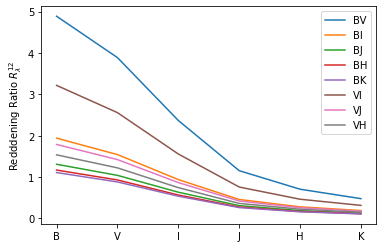

./docs/reports/plots/1_datacleaning/Rratio2.pdf


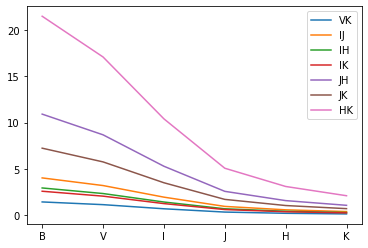

In [6]:
import matplotlib.pyplot as plt
Rm=R_dic(mag)
cols = colors(mag)
for col in cols[0:8]:
    plt.plot([x for x in range(len(mag))],[Rm[f'{m}{col}'] for m in mag], '-', label = col)
plt.ylabel('Redddening Ratio $R_\lambda^{12}$')
plt.legend()
plt.xticks(range(len(mag)), ['B', 'V', 'I', 'J', 'H', 'K'])
imgsave('Rratio1',step=0,img_path='./docs/reports/plots/')
plt.show()
for col in cols[8:]:
    plt.plot([x for x in range(len(mag))],[Rm[f'{m}{col}'] for m in mag], '-', label = col)
plt.legend()
#plt.ylabel('Redddening Ratio $R_\lambda^{12}$')
plt.xticks(range(len(mag)), ['B', 'V', 'I', 'J', 'H', 'K'])
imgsave('Rratio2',step=0,img_path='./docs/reports/plots/')
plt.show()

# Raw Data

In [2]:
from lvtlaw.b_data_transform import plot_corr
from lvtlaw.h_loadoutput import *
raw, absolute, extinction, tabsolute, wesenheit, merged_data = transformation_()  #0
raw
#plot_corr(raw.drop(columns=['name', 'EBV']+dis_list) , Y = 'logP', title = file_name, f=12)

* * datamapping module loaded!


name      logP    EBV        plx   B_mag   V_mag   I_mag  J_mag  H_mag  \
0   CSVel  0.771201  0.737  12.547220  13.049  11.709  10.068  8.840  8.234   
1   CFCas  0.687994  0.553  12.252555  12.338  11.128   9.691  8.701  8.132   
2   UZSct  1.168739  1.020  12.235944  13.124  11.247   9.184  7.534  6.746   
3   LSPup  1.150646  0.462  13.052278  11.685  10.448   9.074  8.094  7.518   
4   ADGem  0.578408  0.173  11.946294  10.547   9.855   9.039  8.527  8.147   
..    ...       ...    ...        ...     ...     ...     ...    ...    ...   
66   SNor  0.989194  0.179   9.728963   7.375   6.429   5.427  4.729  4.275   
67   USgr  0.828997  0.402   8.923041   7.786   6.690   5.426  4.587  4.093   
68   XCyg  1.214482  0.228  10.119499   7.533   6.377   5.223  4.471  3.964   
69   UCar  1.588970  0.263  11.122760   7.469   6.292   5.057  4.193  3.670   
70   TVul  0.646934  0.060   8.779609   6.390   5.753   5.054  4.601  4.270   

    K_mag  
0   8.018  
1   7.966  
2   6.534  
3   7.353  
4   8.077  
..    ...  
66  4.162  
67  3.954  
68  3.838  
69  3.522  
70  4.205  

[71 rows x 10 columns]

# Period Luminosity relations 

In [2]:
from lvtlaw.c_pl_pw import plotPL6, plotPW6, plotPLWres
from lvtlaw.h_loadoutput import *
PLWregression, PLWresidue, PLWprediction, merged_data=PLWcorrection_() # 1
#plotPL6(merged_data, PLWregression, ab = '')
#plotPL6(merged_data, PLWregression, ab = '0')

* * datamapping module loaded!


# Period Wesenheit Relation

Wesenheit  BV
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BV_BVIJHK_j.pdf


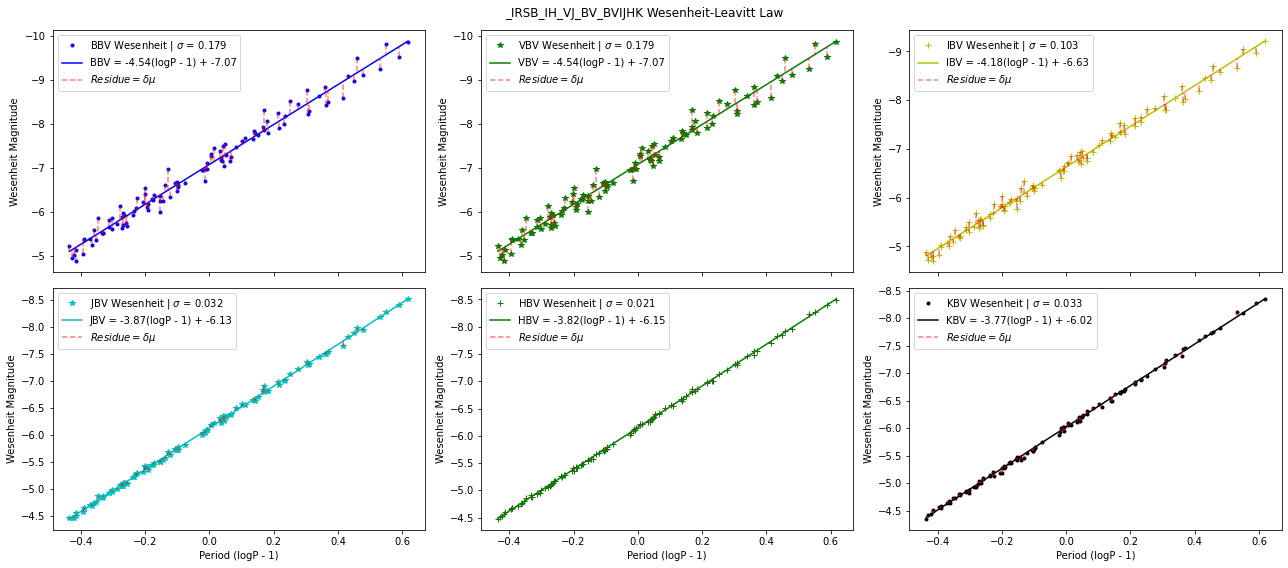

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_BV_j_residuals.pdf


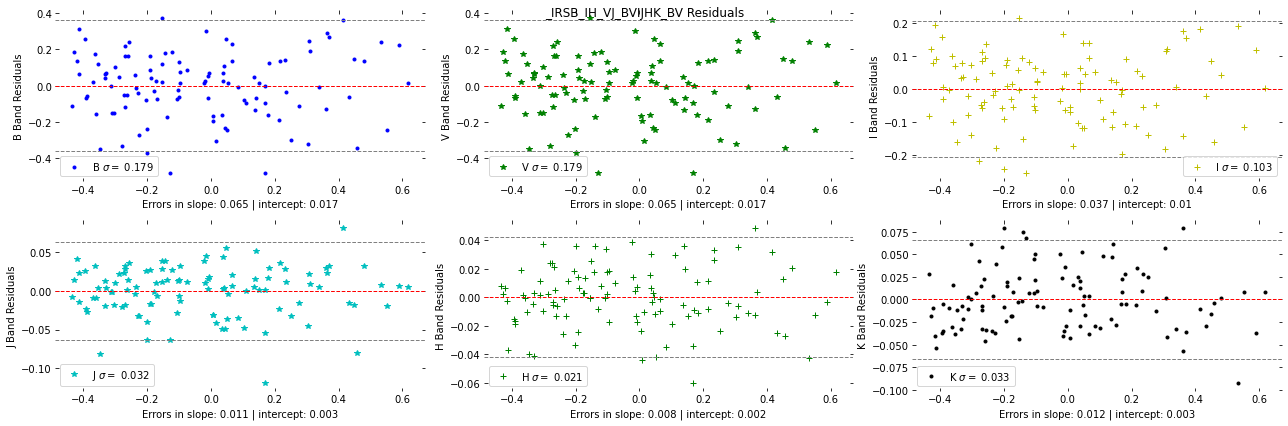

Wesenheit  BI
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BI_BVIJHK_j.pdf


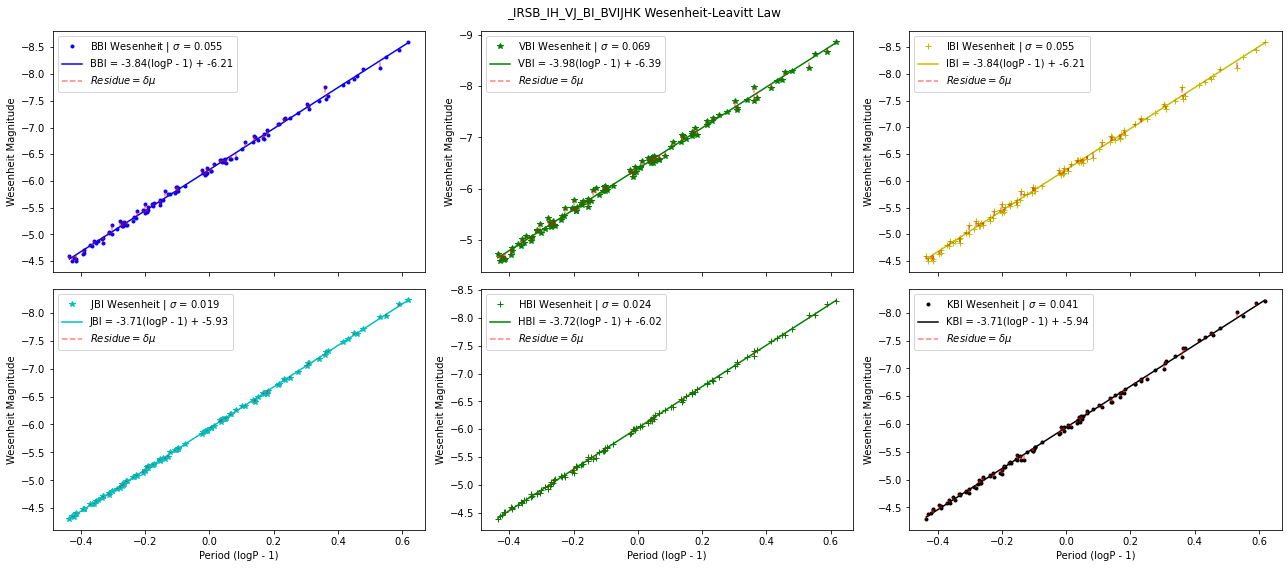

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_BI_j_residuals.pdf


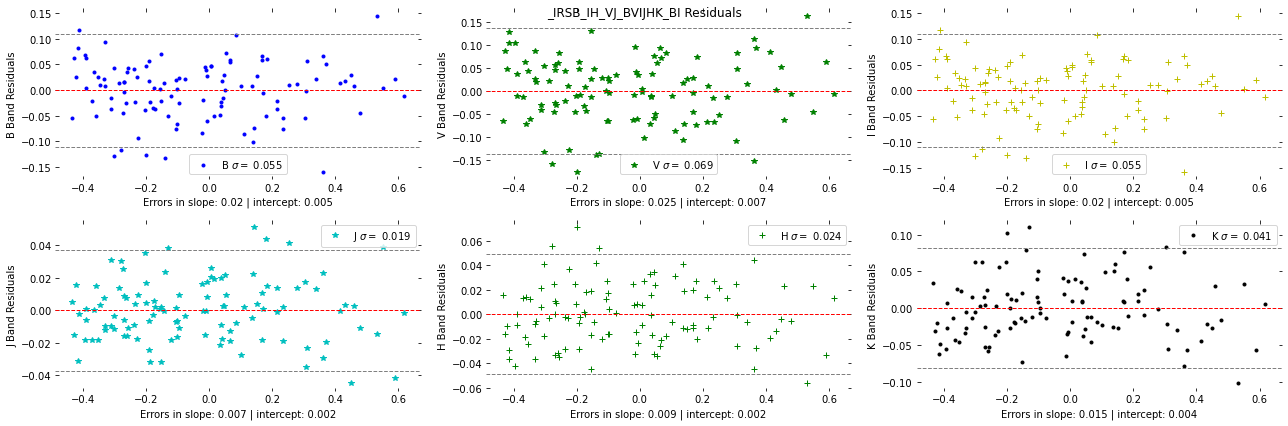

Wesenheit  BJ
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BJ_BVIJHK_j.pdf


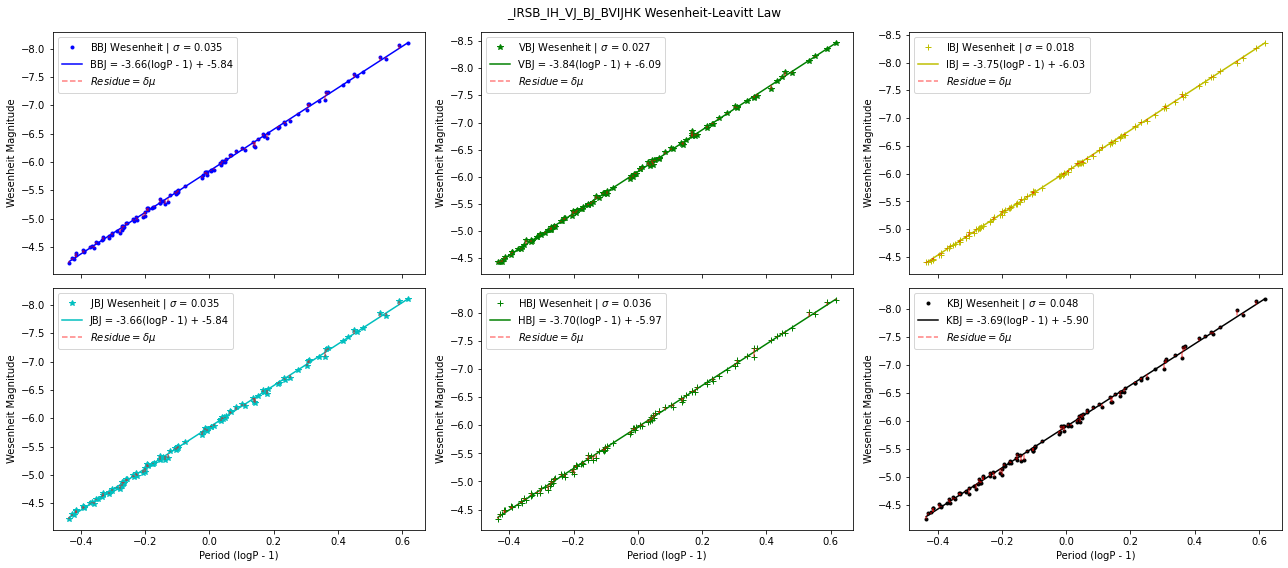

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_BJ_j_residuals.pdf


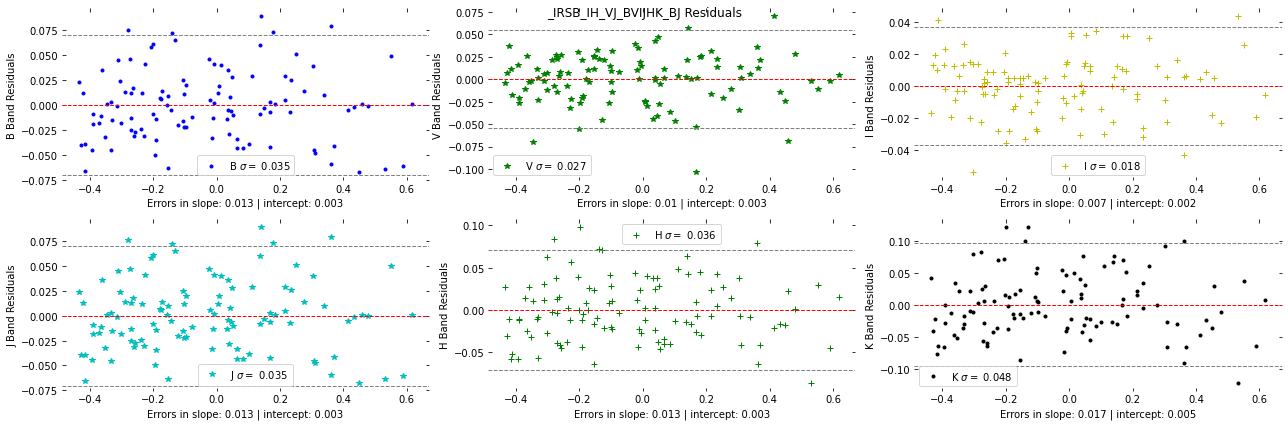

Wesenheit  BH
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BH_BVIJHK_j.pdf


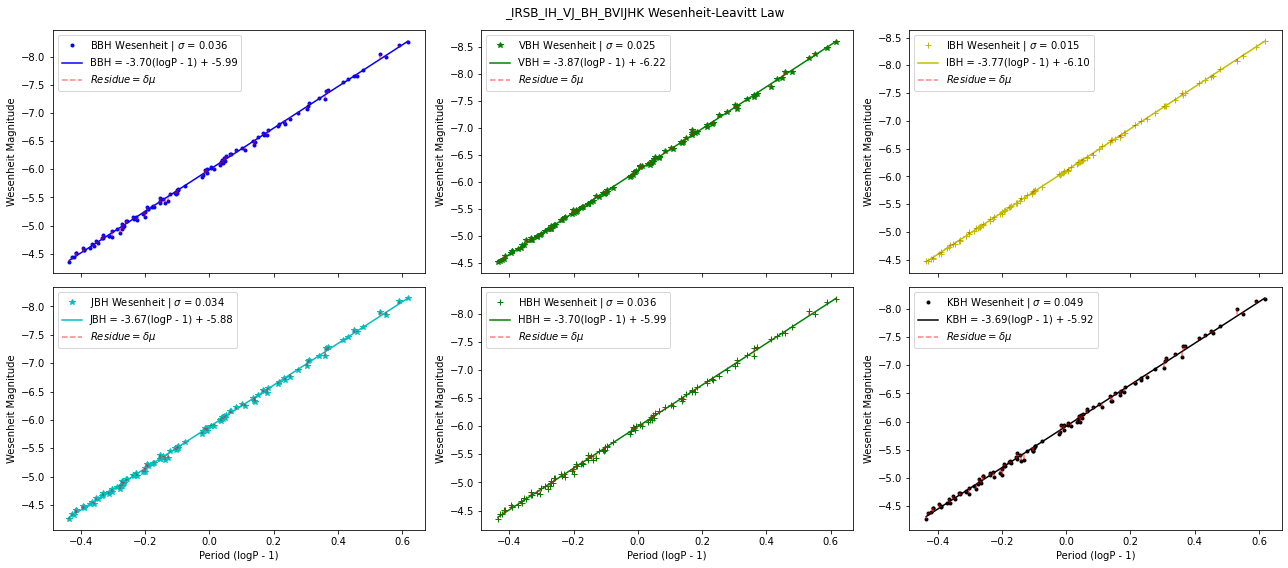

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_BH_j_residuals.pdf


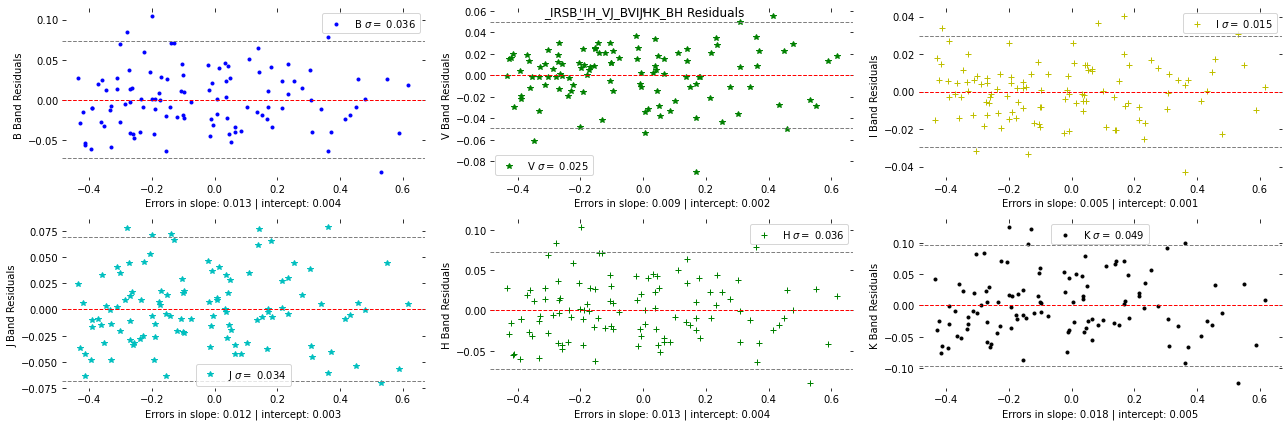

Wesenheit  BK
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BK_BVIJHK_j.pdf


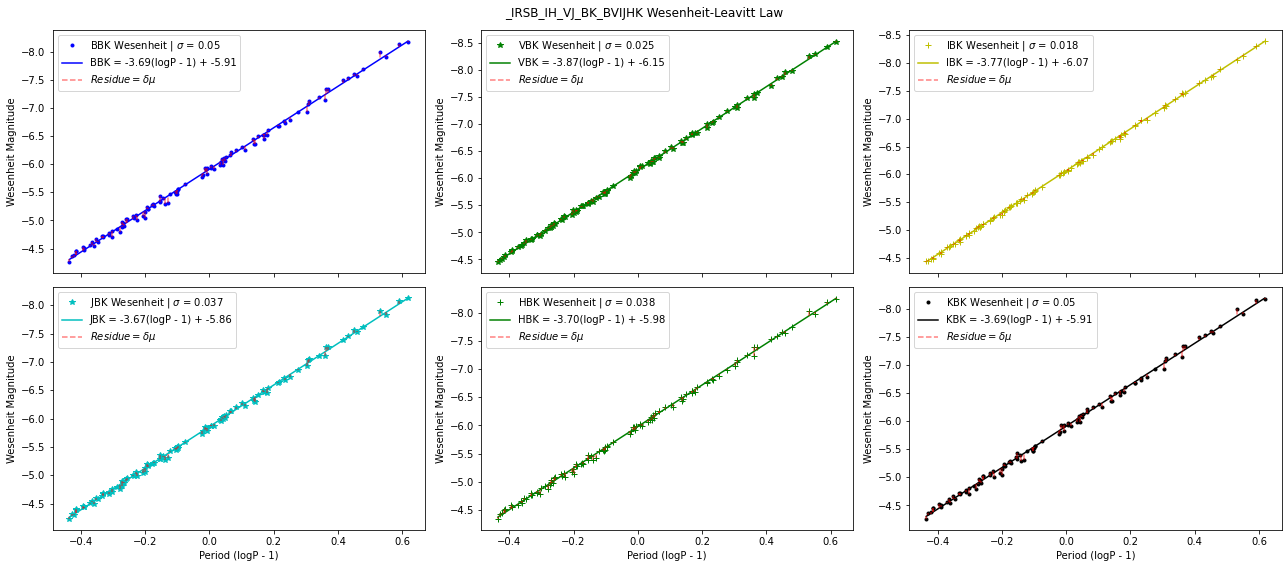

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_BK_j_residuals.pdf


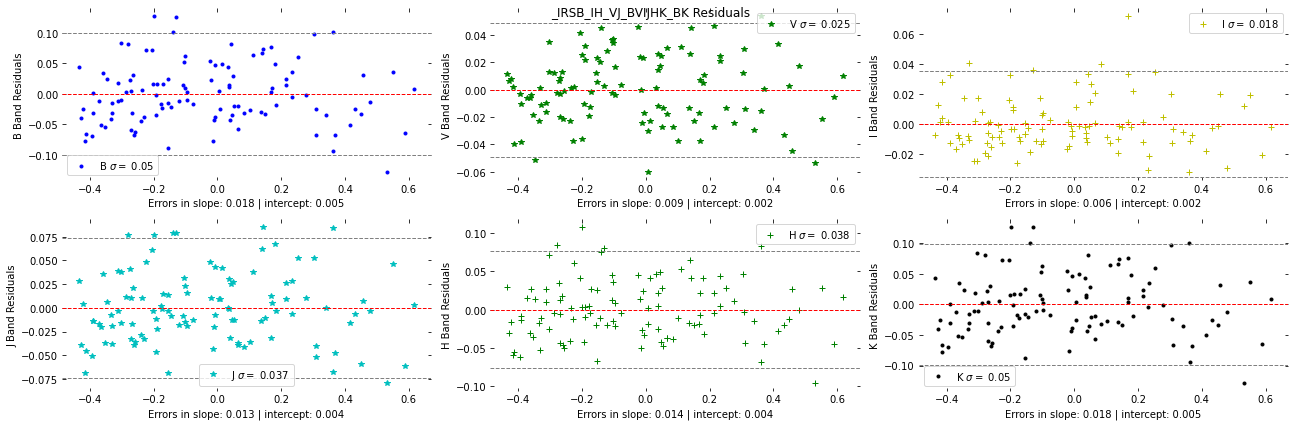

Wesenheit  VI
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_VI_BVIJHK_j.pdf


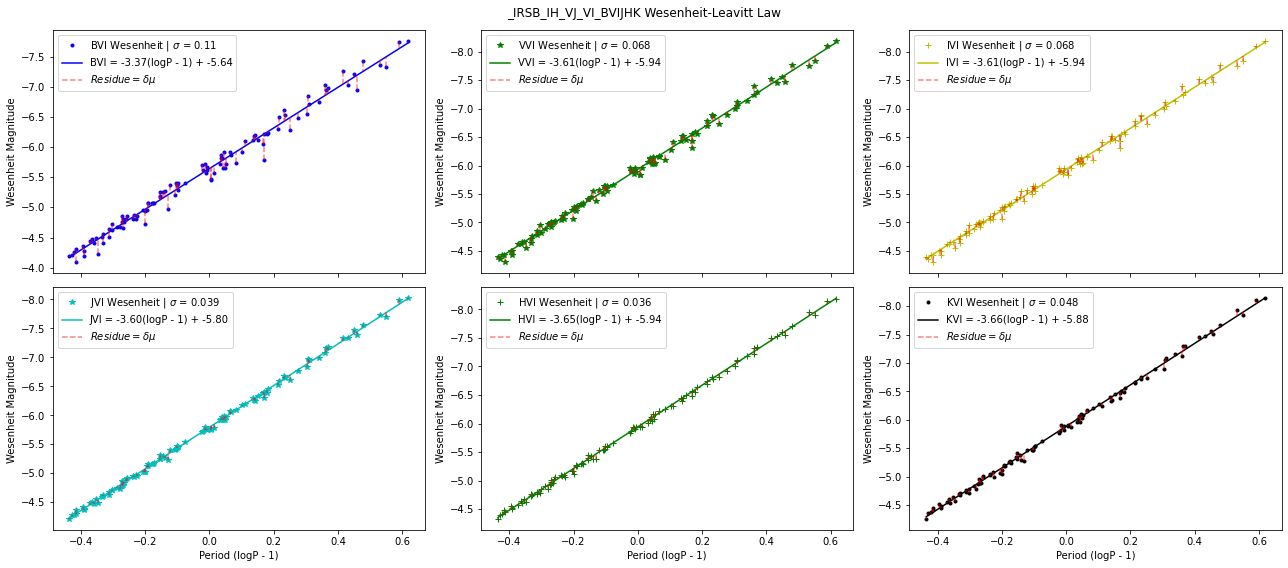

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_VI_j_residuals.pdf


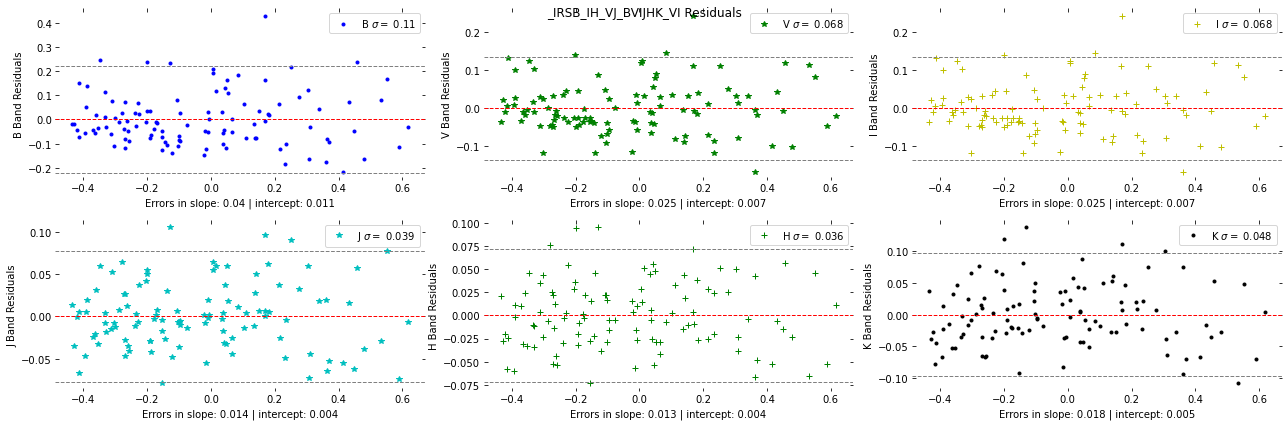

Wesenheit  VJ
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_VJ_BVIJHK_j.pdf


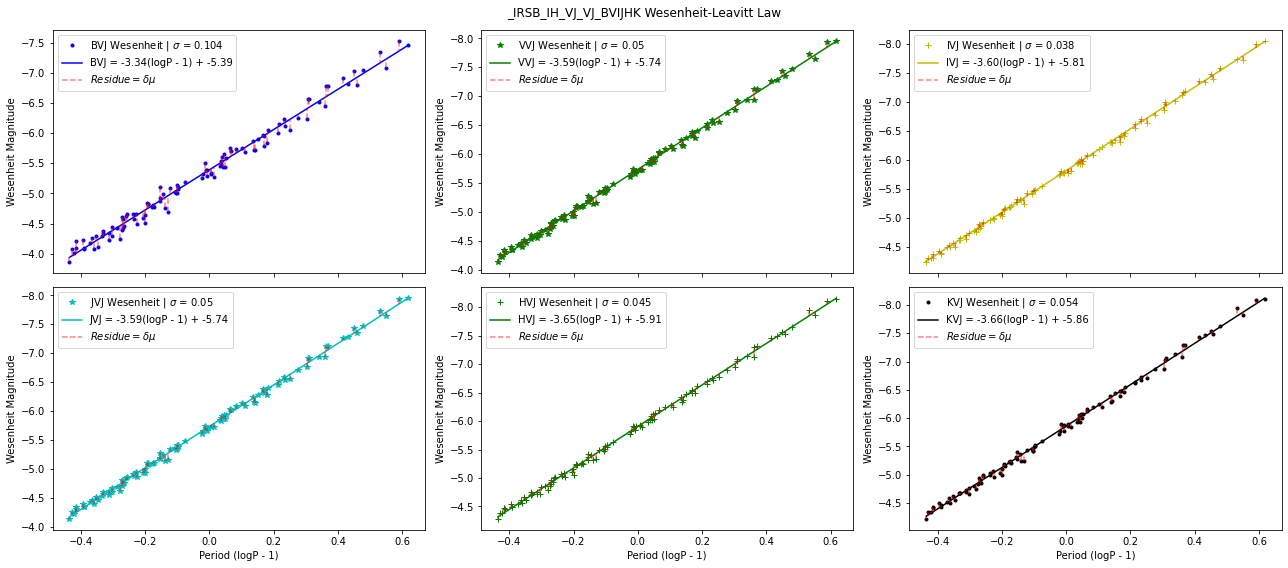

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_VJ_j_residuals.pdf


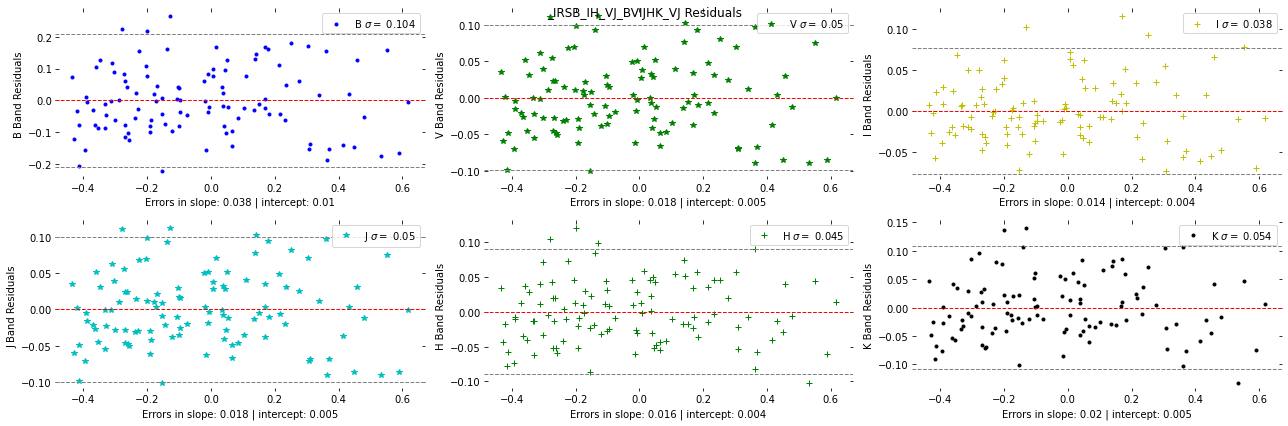

Wesenheit  VH
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_VH_BVIJHK_j.pdf


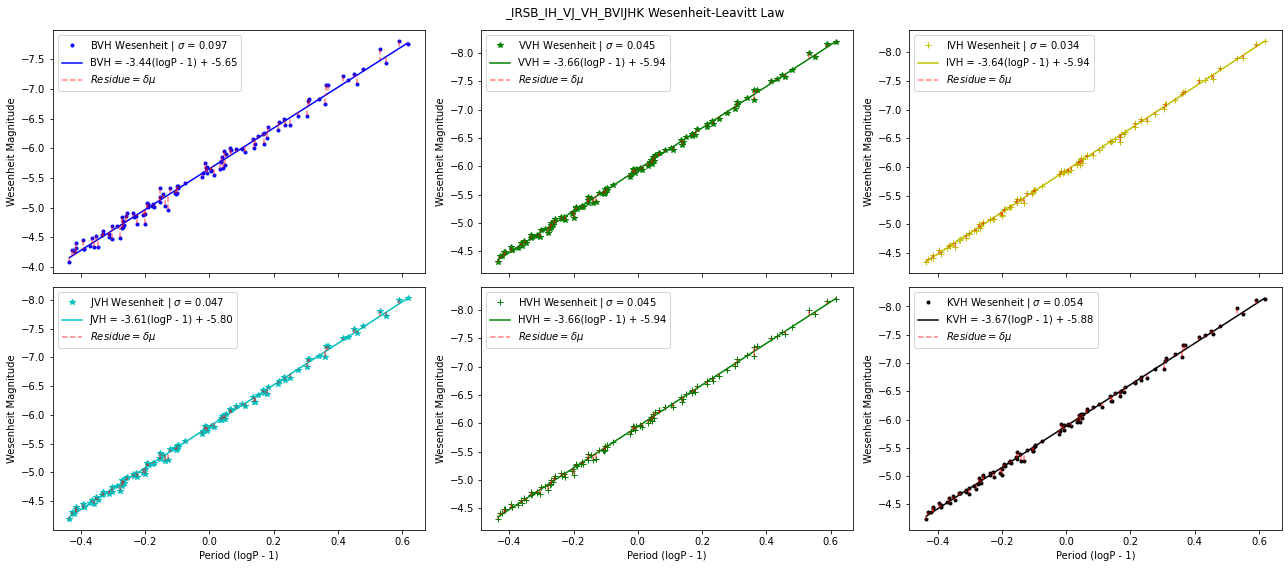

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_VH_j_residuals.pdf


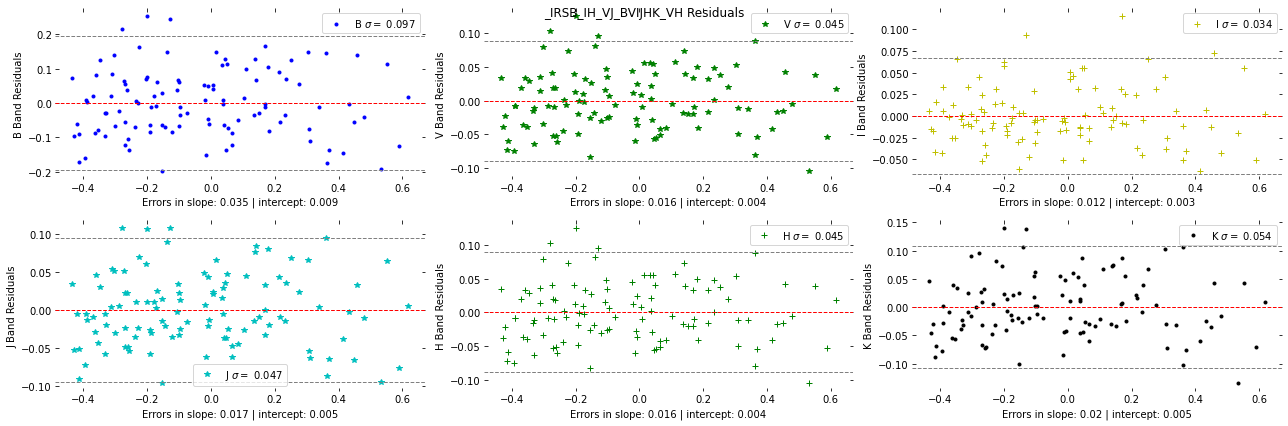

Wesenheit  VK
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_VK_BVIJHK_j.pdf


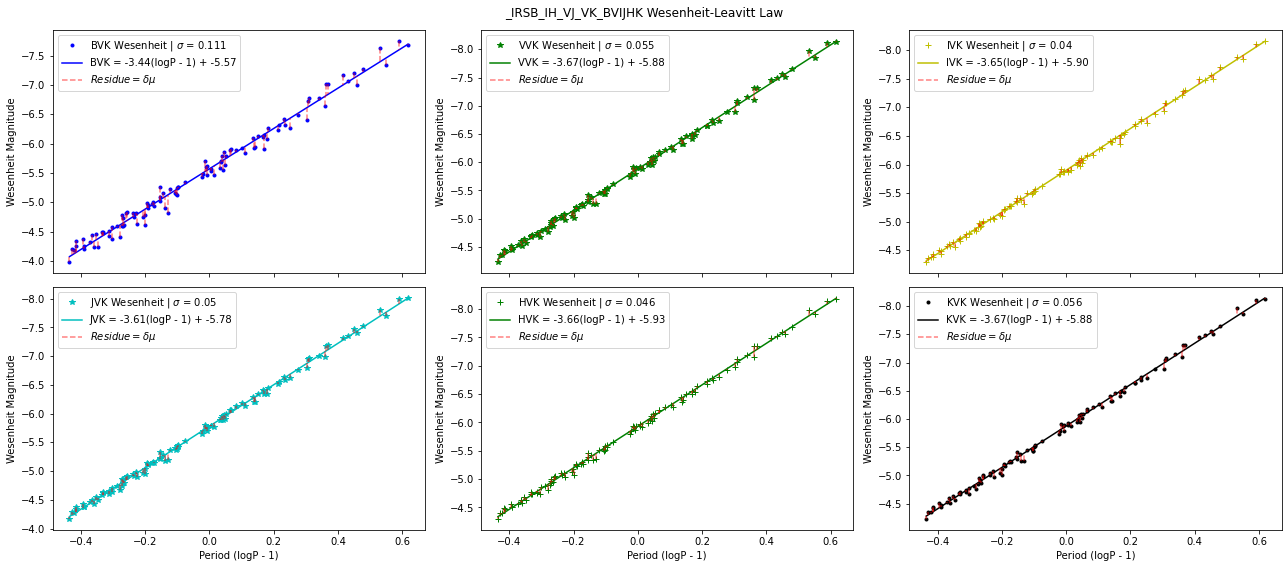

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_VK_j_residuals.pdf


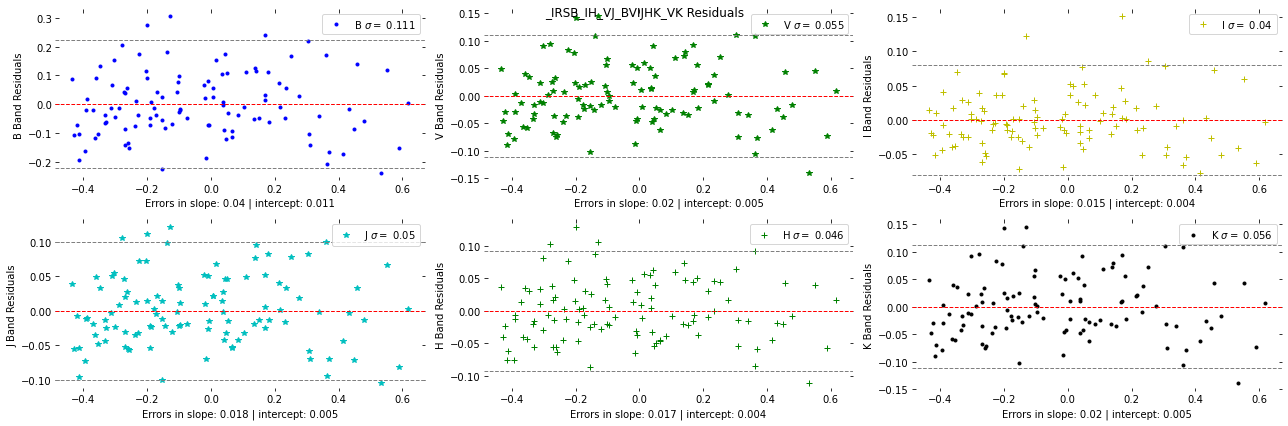

Wesenheit  IJ
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_IJ_BVIJHK_j.pdf


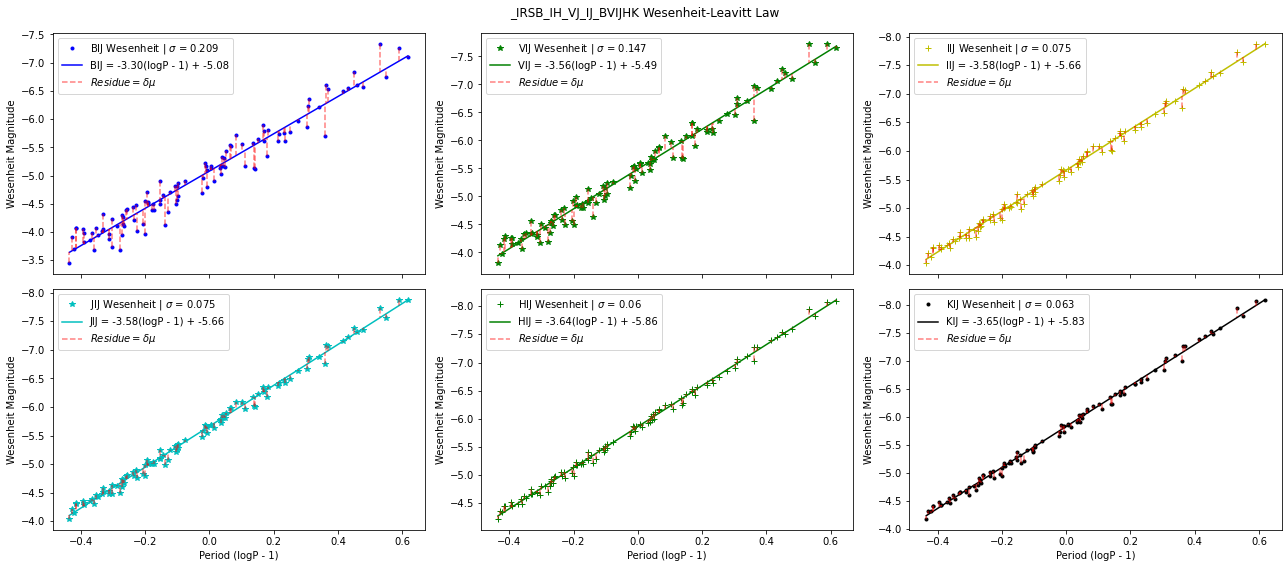

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_IJ_j_residuals.pdf


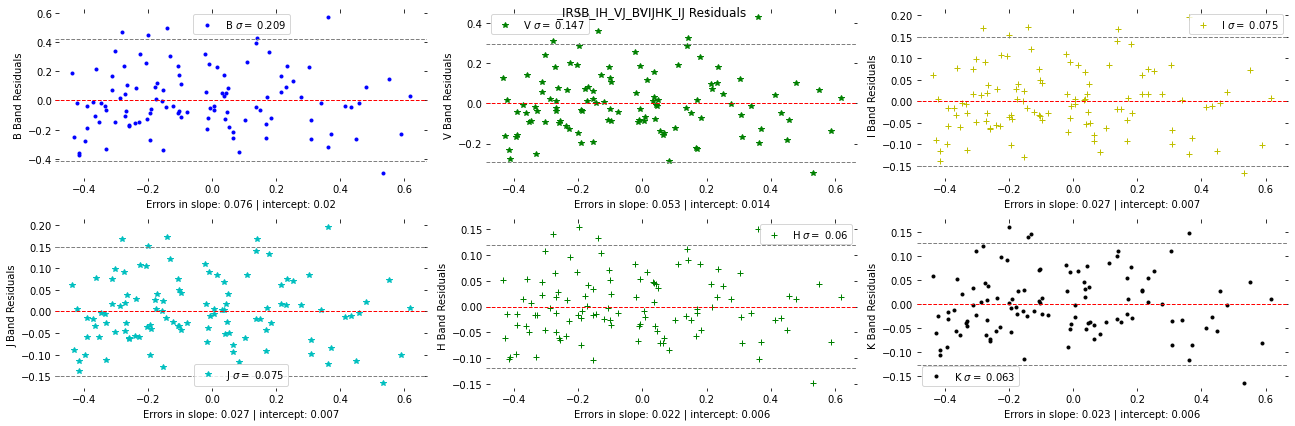

Wesenheit  IH
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_IH_BVIJHK_j.pdf


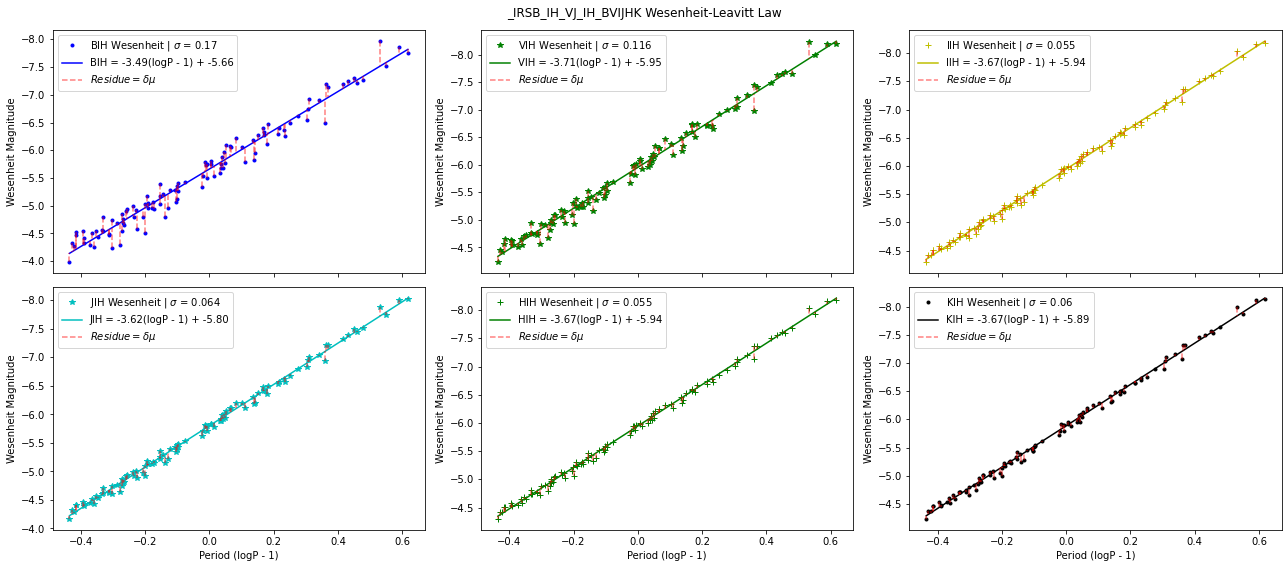

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_IH_j_residuals.pdf


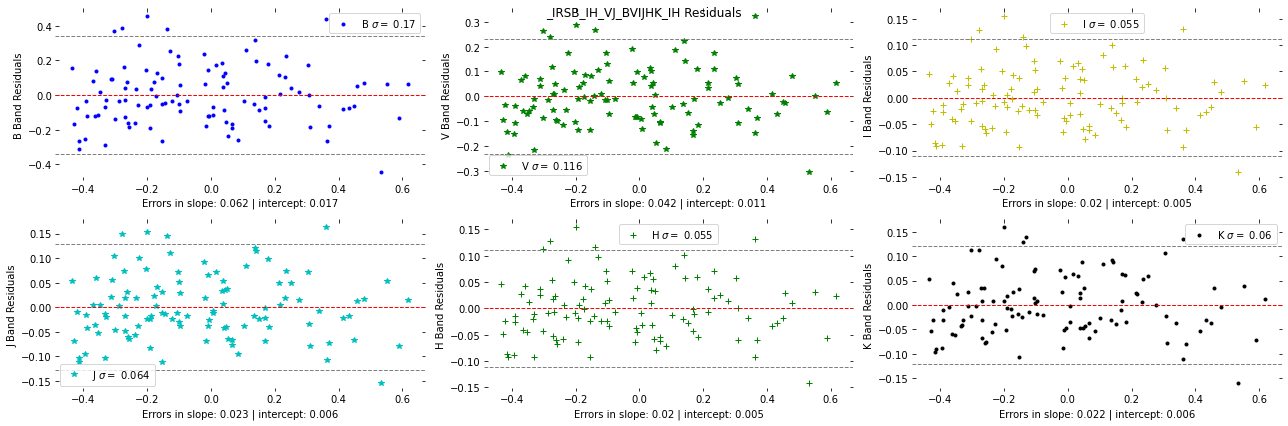

Wesenheit  IK
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_IK_BVIJHK_j.pdf


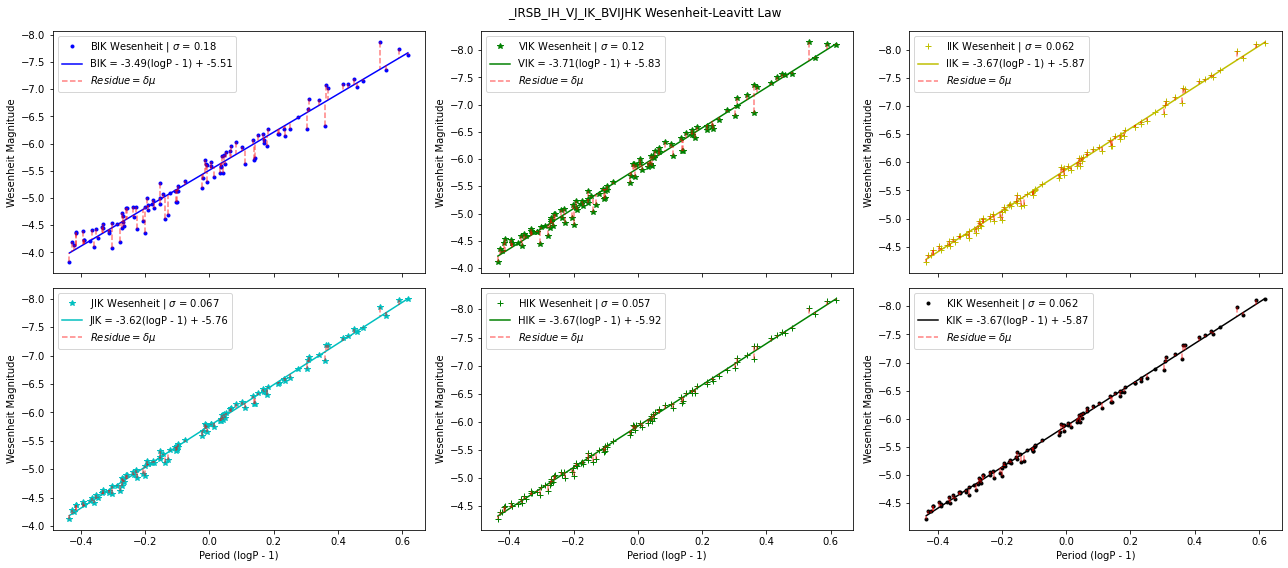

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_IK_j_residuals.pdf


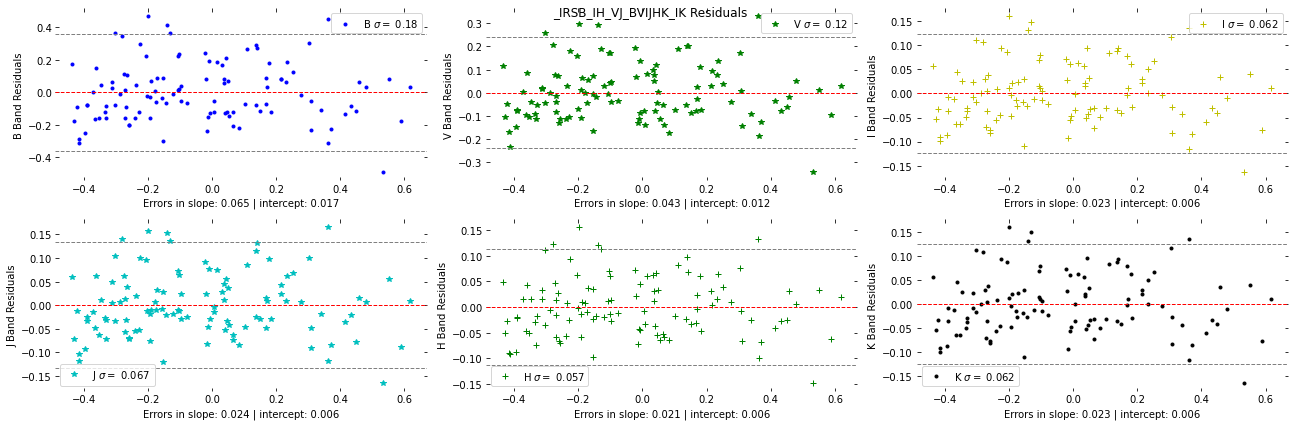

Wesenheit  JH
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_JH_BVIJHK_j.pdf


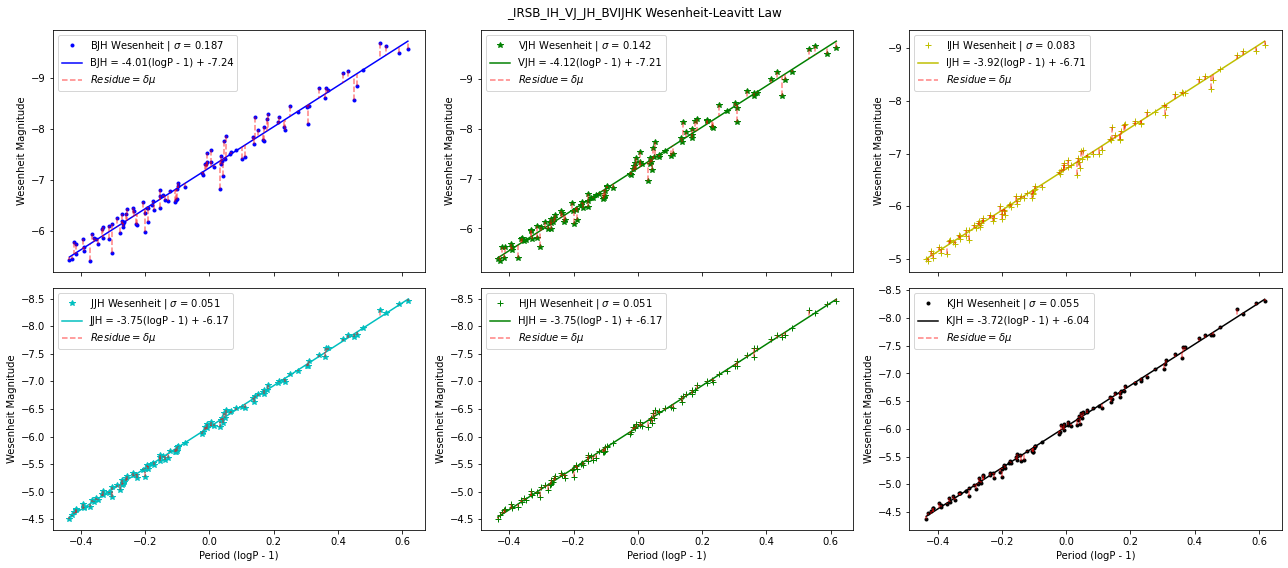

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_JH_j_residuals.pdf


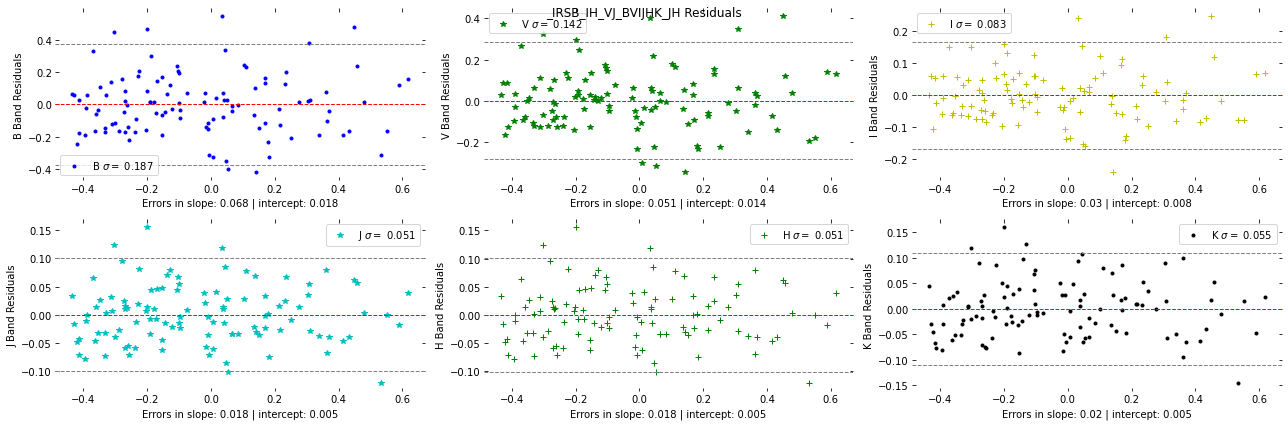

Wesenheit  JK
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_JK_BVIJHK_j.pdf


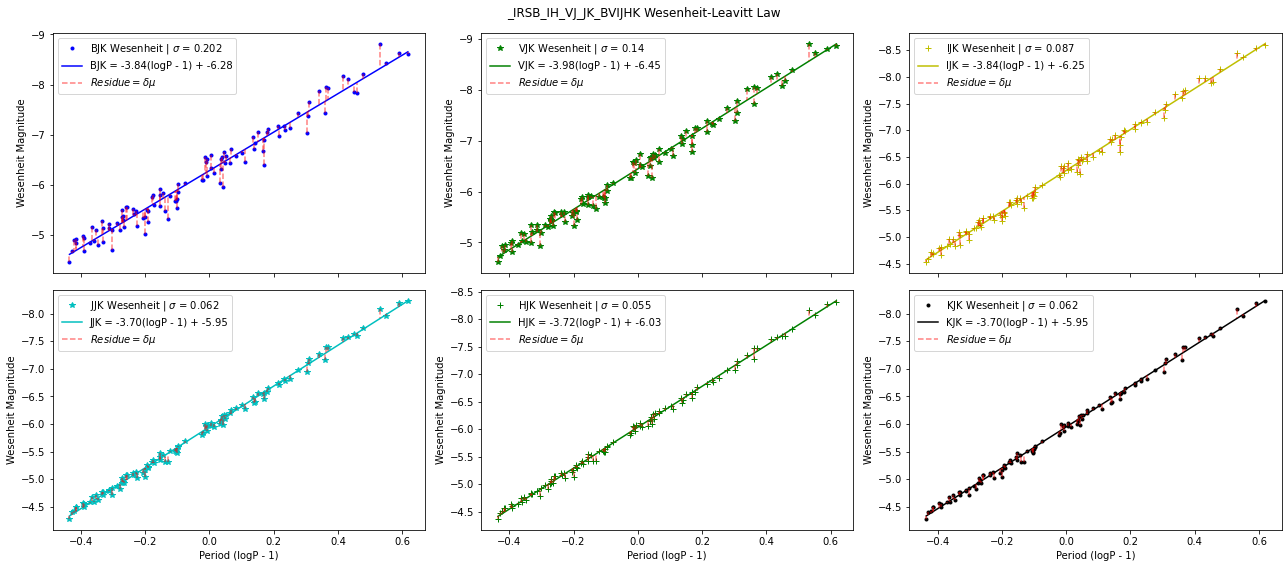

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_JK_j_residuals.pdf


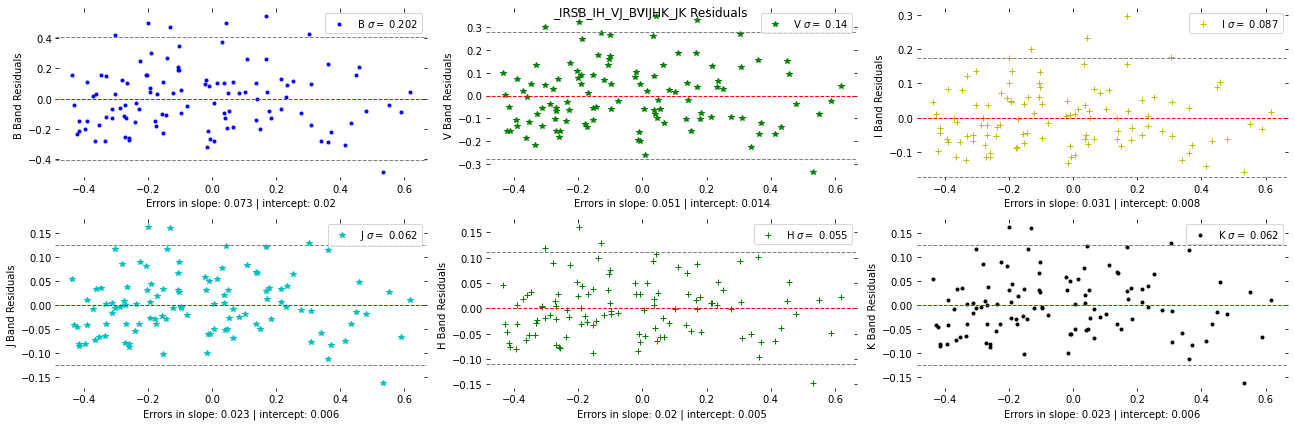

Wesenheit  HK
./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_HK_BVIJHK_j.pdf


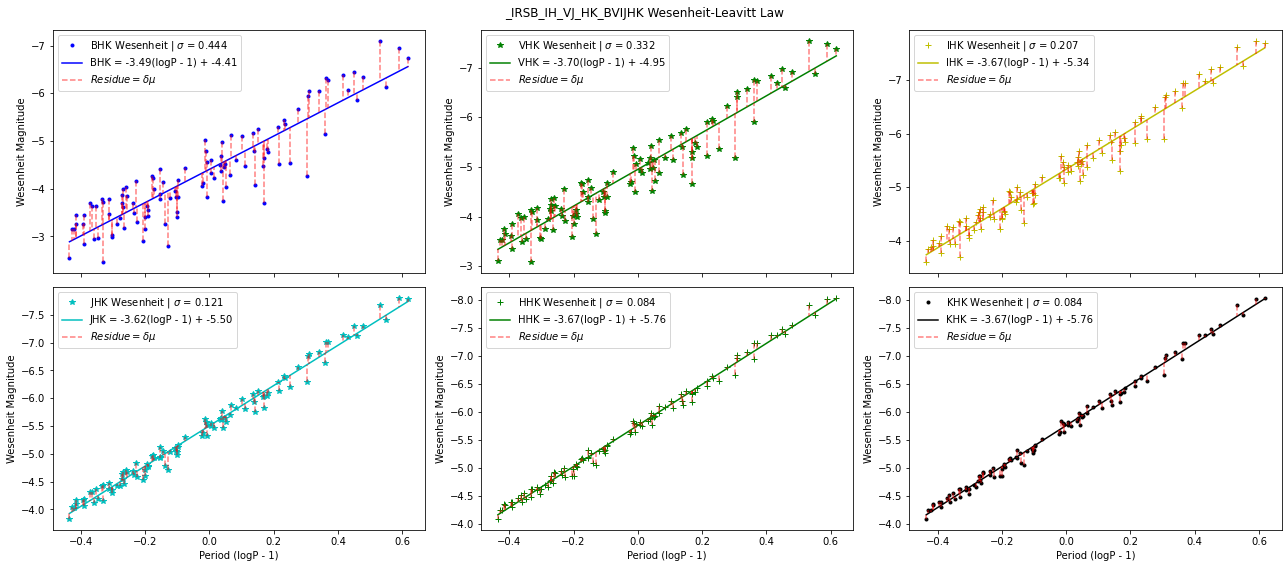

./docs/reports/plots/2_PLPW/109_IRSB_IH_VJ_BVIJHK_HK_j_residuals.pdf


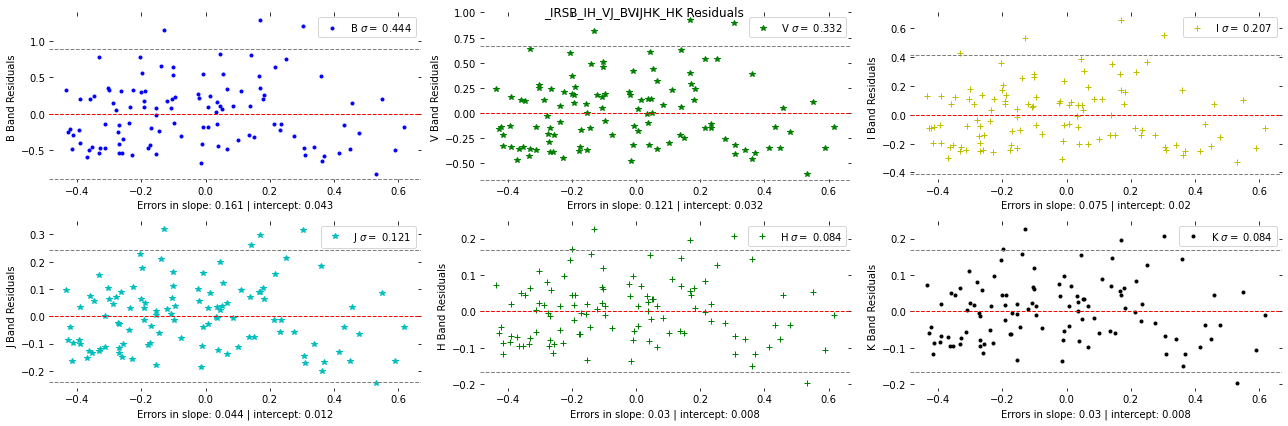

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [4]:
[plotPW6(merged_data, PLWregression, col) for col in wes_show]

# Residue - Residue Plot

For Wesenheit:
BV
./docs/reports/plots/3_deldel/71_IRSB_plx_deldel_S_0BV_p.pdf


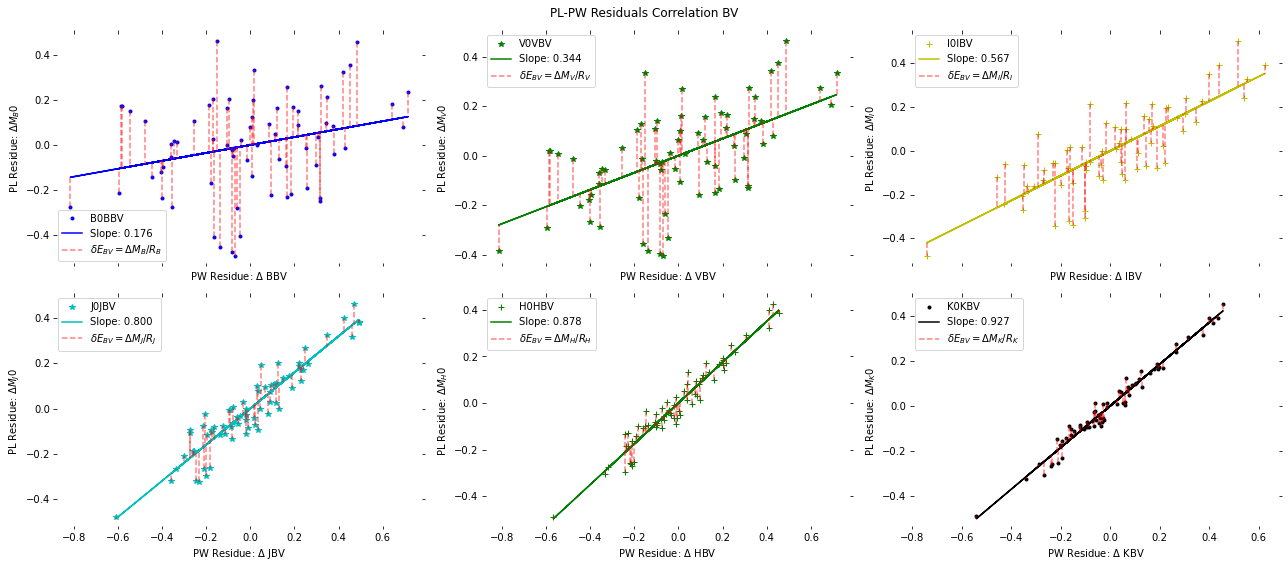

VI
./docs/reports/plots/3_deldel/71_IRSB_plx_deldel_S_0VI_p.pdf


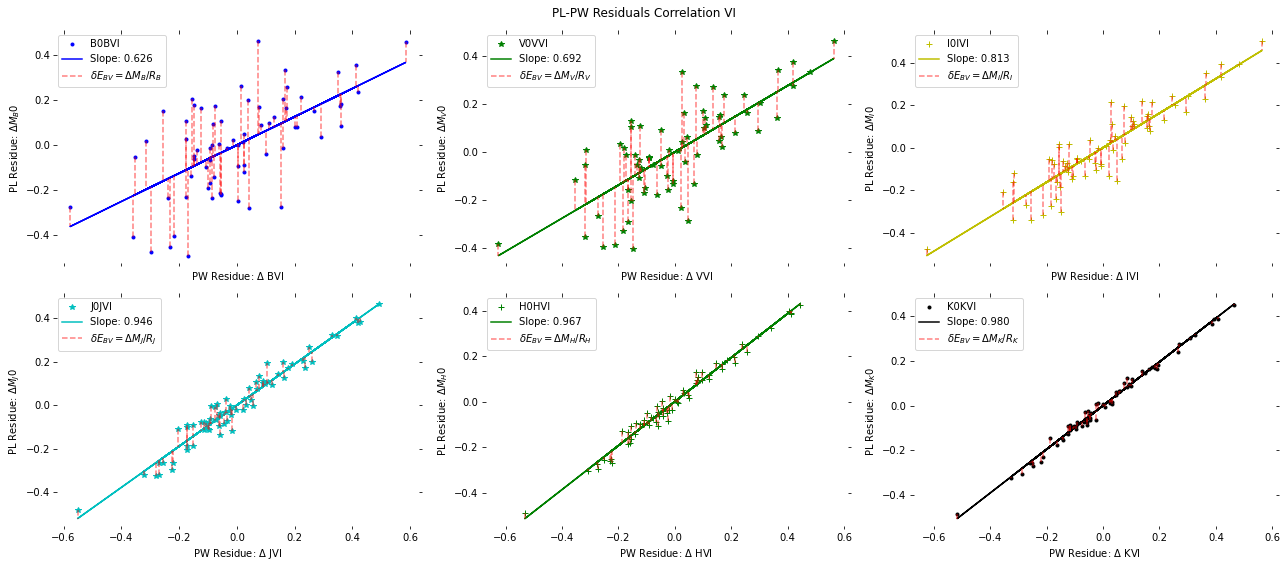

VJ
./docs/reports/plots/3_deldel/71_IRSB_plx_deldel_S_0VJ_p.pdf


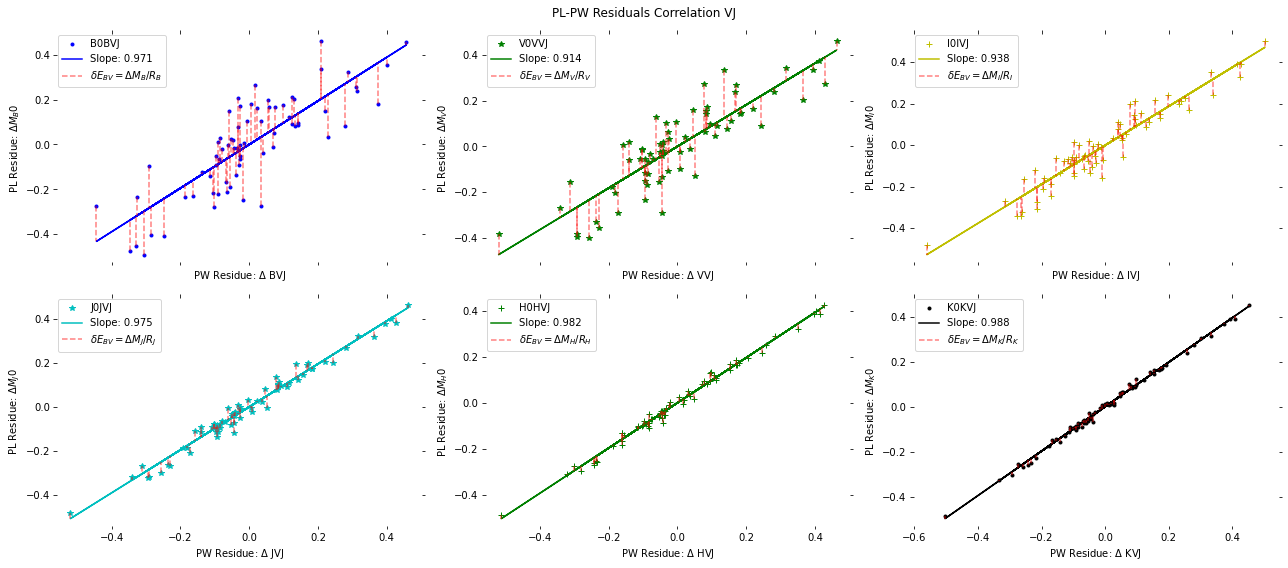

IH
./docs/reports/plots/3_deldel/71_IRSB_plx_deldel_S_0IH_p.pdf


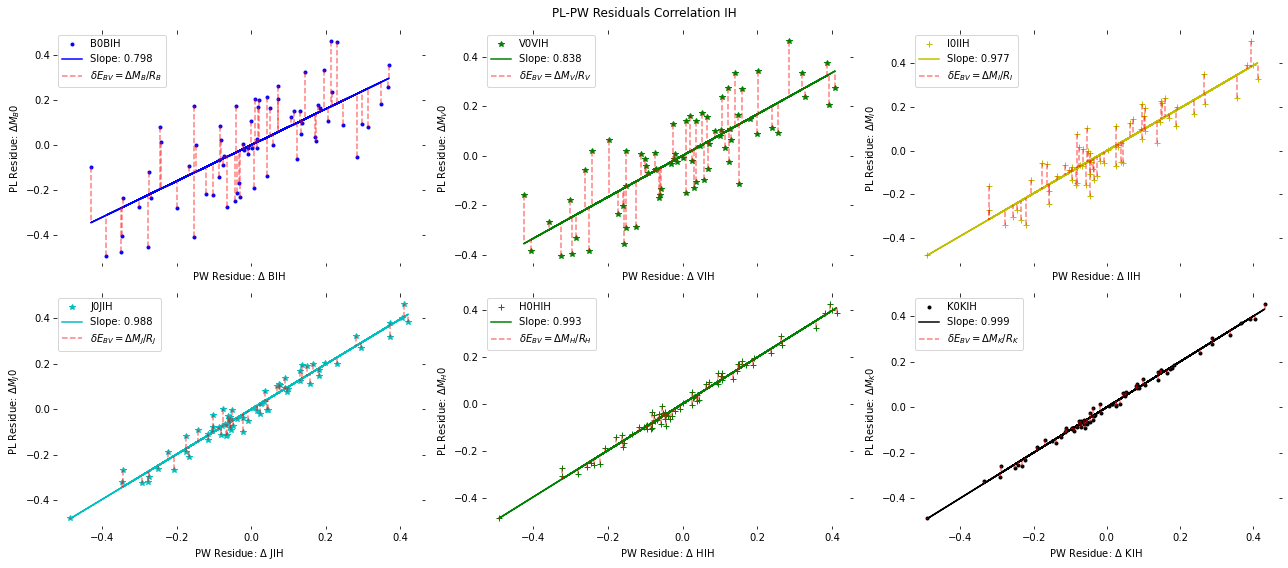

HK
./docs/reports/plots/3_deldel/71_IRSB_plx_deldel_S_0HK_p.pdf


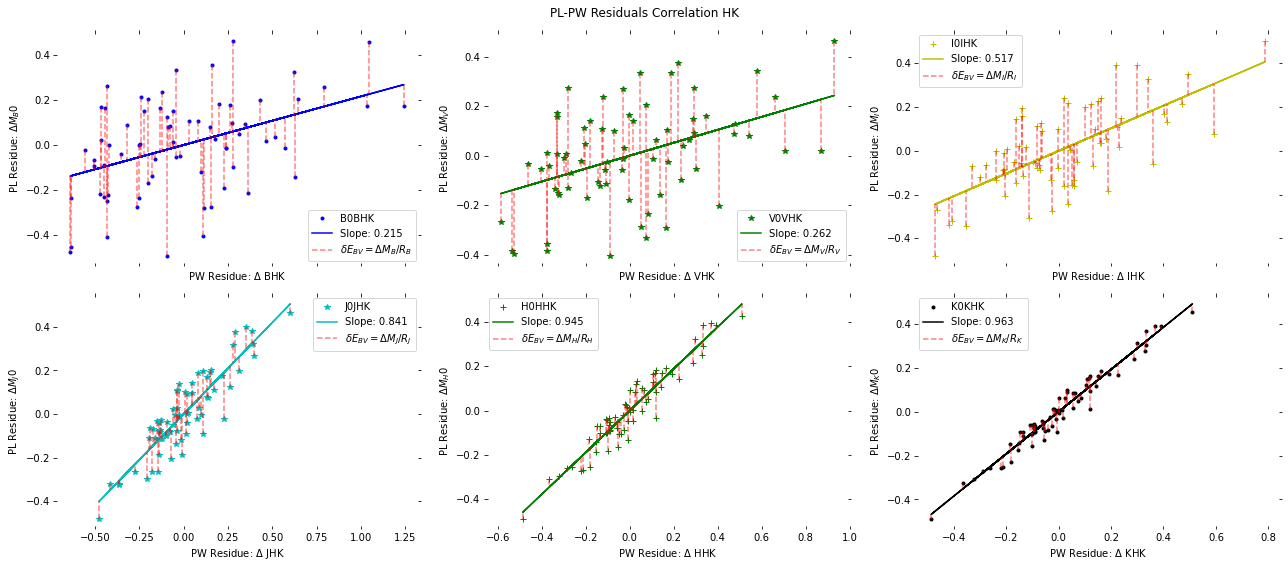

[None, None, None, None, None]

In [4]:
from lvtlaw.d_del_del import plotdeldel6
from lvtlaw.h_loadoutput import *
dmc, dpre, dres, merged_data = residual_correlation_() #2
print(f'For Wesenheit:')
dd = ['BV','VI','VJ','VK','IJ','IH','IK', 'JK', 'JH', 'HK']
[plotdeldel6(merged_data, dmc, col, dis, 'S', '0', 1) for col in ['BV','VI','VJ','IH','HK']]

In [8]:
merged_data[merged_data[f'r_JHK{dis_flag[0]}']>1]

Unnamed: 0   name      logP    EBV    IRSB  M_B_j  M_V_j  M_I_j  M_J_j  \
47          47  CKSct  0.870124  0.757  10.438  1.727  0.137  -1.66  -2.94   

    M_H_j  ...  p_I0IJK_j  p_J0JJK_j  p_H0HJK_j  p_K0KJK_j  p_B0BHK_j  \
47 -3.618  ...   1.048608   1.061063   1.036117   1.070565   0.988502   

    p_V0VHK_j  p_I0IHK_j  p_J0JHK_j  p_H0HHK_j  p_K0KHK_j  
47   0.951749    1.08628   1.136947   1.104794   1.117444  

[1 rows x 569 columns]

* * datamapping module loaded!
* * a_utils module loaded!
* * datamapping module loaded!
* * b_data_transform module loaded!
* * c_pl_pw module loaded!
* * e_error_estimation module loaded!
./docs/plots/4_reddening/94_jesper_2_BV_0SM.pdf


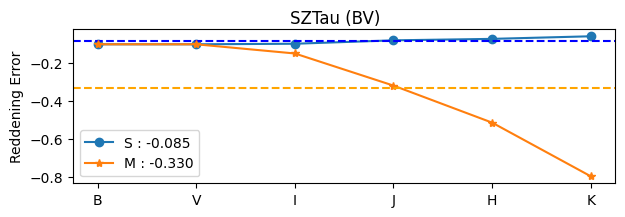

./docs/plots/4_reddening/94_jesper_2_BI_0SM.pdf


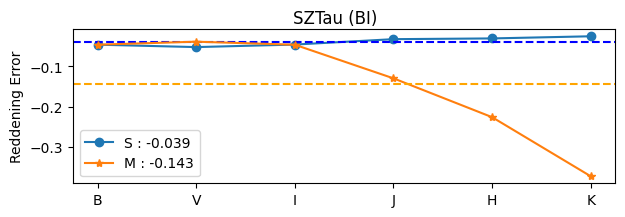

./docs/plots/4_reddening/94_jesper_2_BJ_0SM.pdf


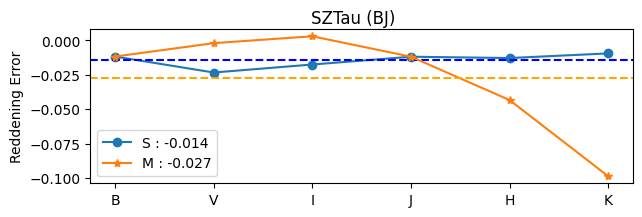

./docs/plots/4_reddening/94_jesper_2_BH_0SM.pdf


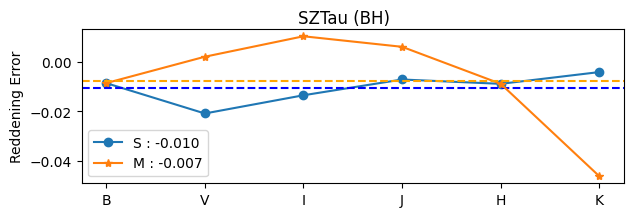

./docs/plots/4_reddening/94_jesper_2_BK_0SM.pdf


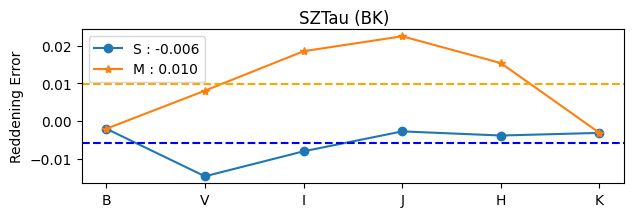

./docs/plots/4_reddening/94_jesper_2_VI_0SM.pdf


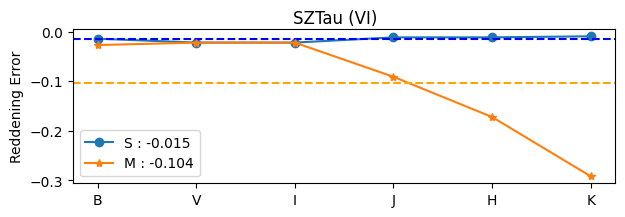

./docs/plots/4_reddening/94_jesper_2_VJ_0SM.pdf


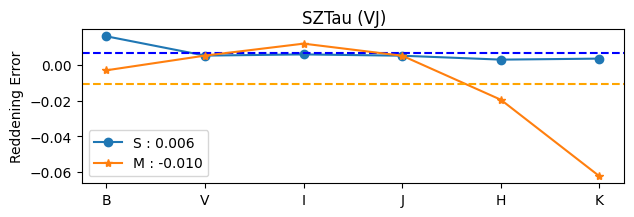

./docs/plots/4_reddening/94_jesper_2_VH_0SM.pdf


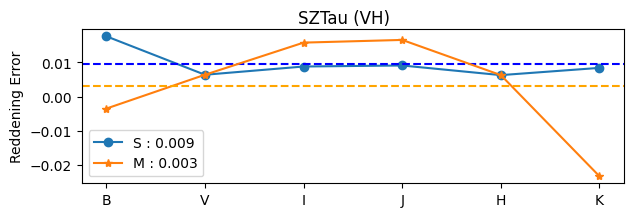

./docs/plots/4_reddening/94_jesper_2_VK_0SM.pdf


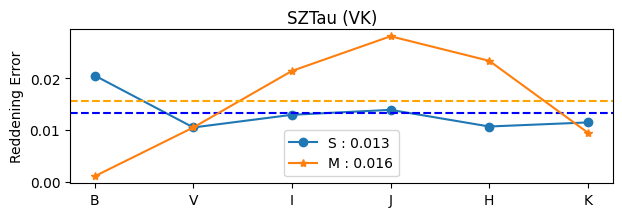

./docs/plots/4_reddening/94_jesper_2_IJ_0SM.pdf


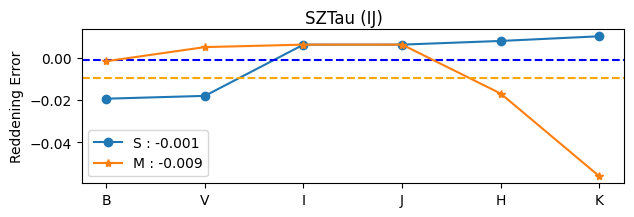

./docs/plots/4_reddening/94_jesper_2_IH_0SM.pdf


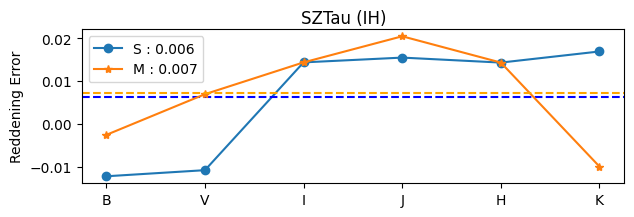

./docs/plots/4_reddening/94_jesper_2_IK_0SM.pdf


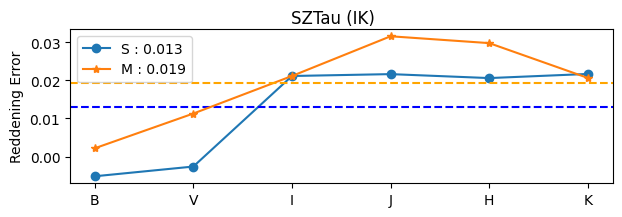

./docs/plots/4_reddening/94_jesper_2_JH_0SM.pdf


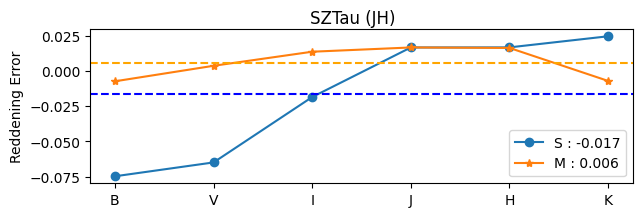

./docs/plots/4_reddening/94_jesper_2_JK_0SM.pdf


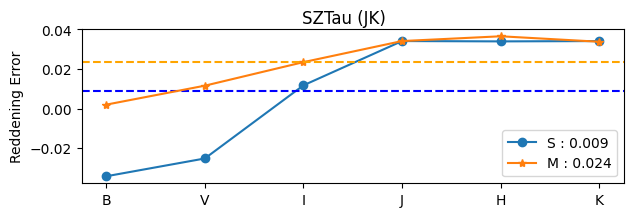

./docs/plots/4_reddening/94_jesper_2_HK_0SM.pdf


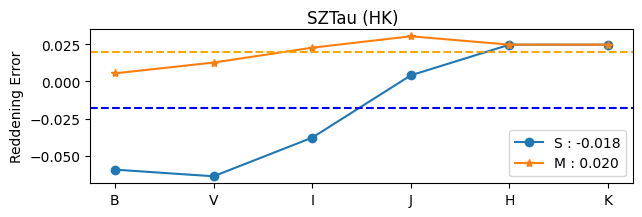

./docs/plots/4_reddening/94_jesper_3_BV_0SM.pdf


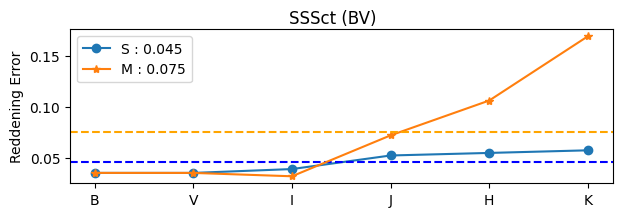

./docs/plots/4_reddening/94_jesper_3_BI_0SM.pdf


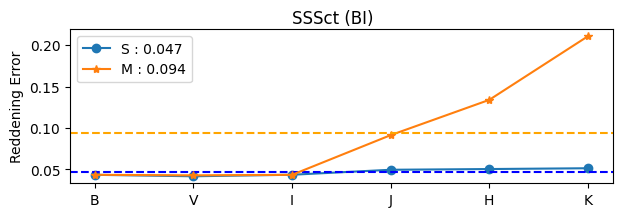

./docs/plots/4_reddening/94_jesper_3_BJ_0SM.pdf


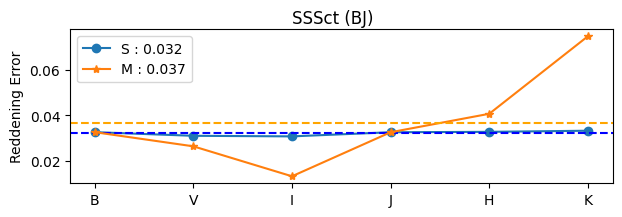

./docs/plots/4_reddening/94_jesper_3_BH_0SM.pdf


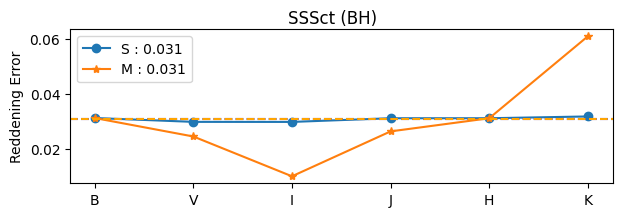

./docs/plots/4_reddening/94_jesper_3_BK_0SM.pdf


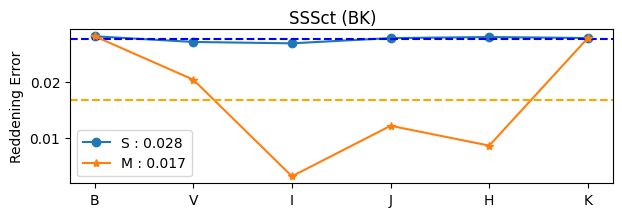

./docs/plots/4_reddening/94_jesper_3_VI_0SM.pdf


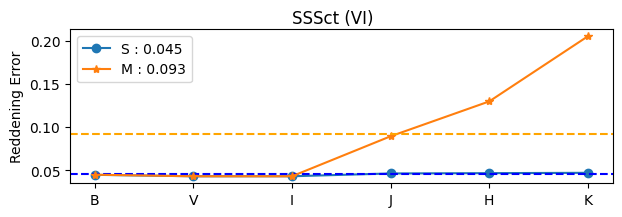

./docs/plots/4_reddening/94_jesper_3_VJ_0SM.pdf


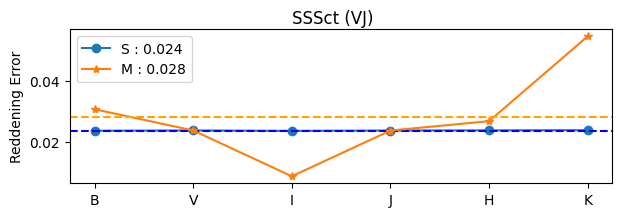

./docs/plots/4_reddening/94_jesper_3_VH_0SM.pdf


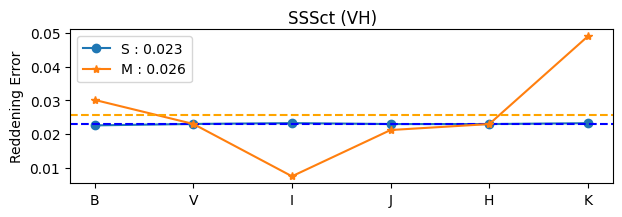

./docs/plots/4_reddening/94_jesper_3_VK_0SM.pdf


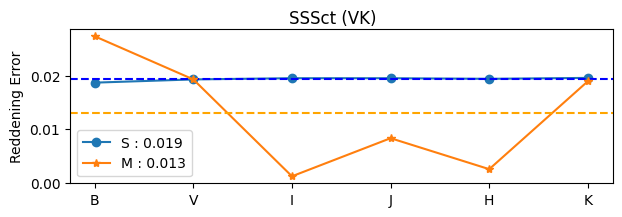

./docs/plots/4_reddening/94_jesper_3_IJ_0SM.pdf


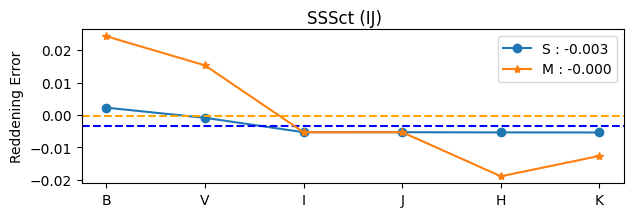

./docs/plots/4_reddening/94_jesper_3_IH_0SM.pdf


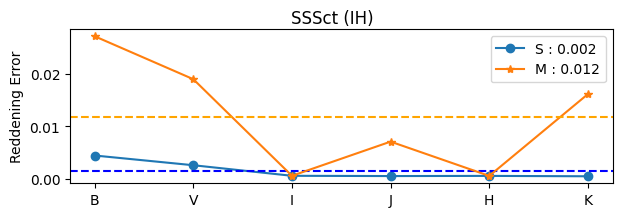

./docs/plots/4_reddening/94_jesper_3_IK_0SM.pdf


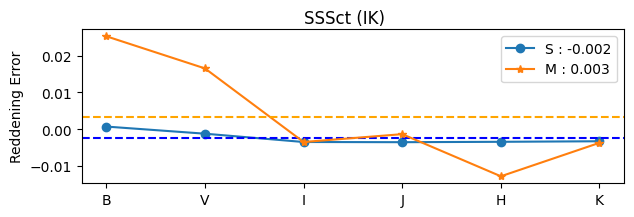

./docs/plots/4_reddening/94_jesper_3_JH_0SM.pdf


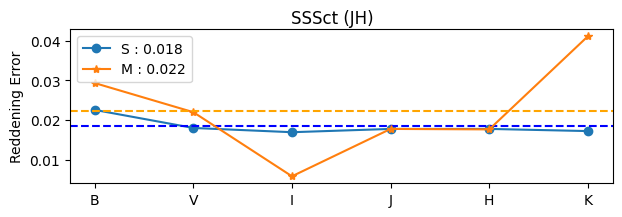

./docs/plots/4_reddening/94_jesper_3_JK_0SM.pdf


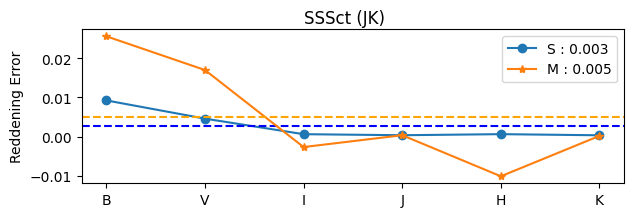

./docs/plots/4_reddening/94_jesper_3_HK_0SM.pdf


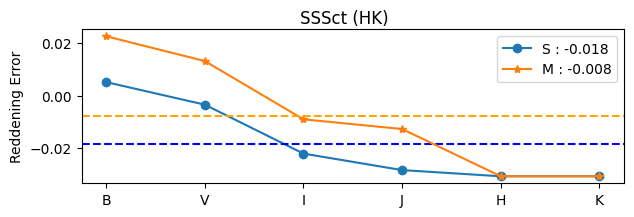

./docs/plots/4_reddening/94_jesper_4_BV_0SM.pdf


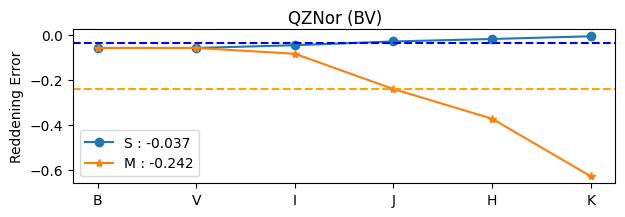

./docs/plots/4_reddening/94_jesper_4_BI_0SM.pdf


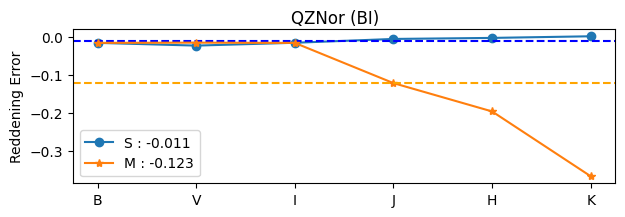

./docs/plots/4_reddening/94_jesper_4_BJ_0SM.pdf


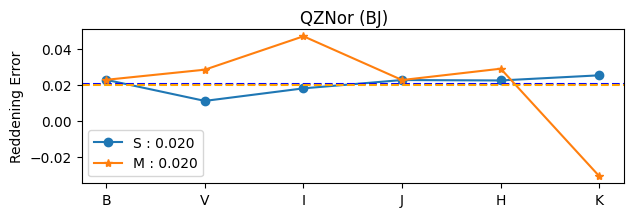

./docs/plots/4_reddening/94_jesper_4_BH_0SM.pdf


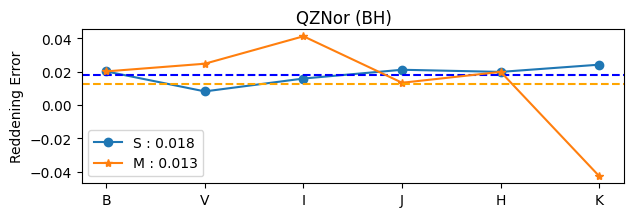

./docs/plots/4_reddening/94_jesper_4_BK_0SM.pdf


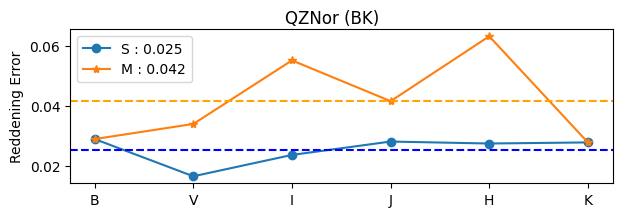

./docs/plots/4_reddening/94_jesper_4_VI_0SM.pdf


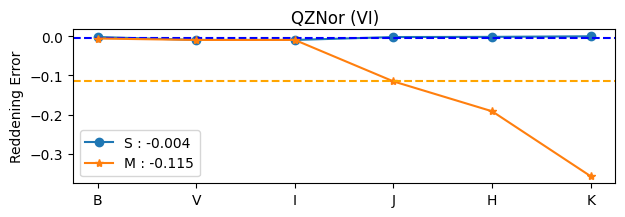

./docs/plots/4_reddening/94_jesper_4_VJ_0SM.pdf


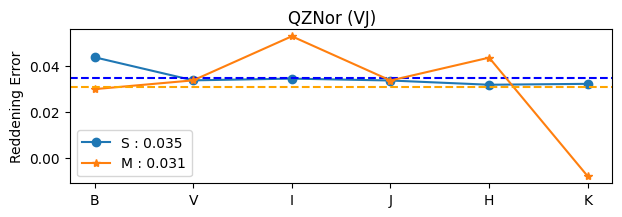

./docs/plots/4_reddening/94_jesper_4_VH_0SM.pdf


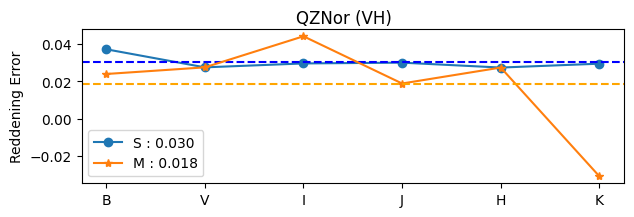

./docs/plots/4_reddening/94_jesper_4_VK_0SM.pdf


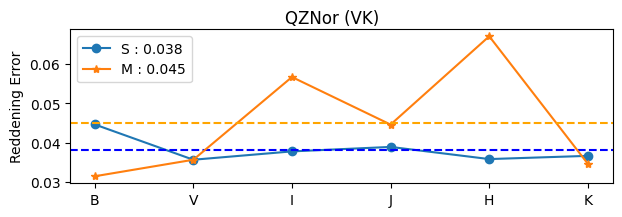

./docs/plots/4_reddening/94_jesper_4_IJ_0SM.pdf


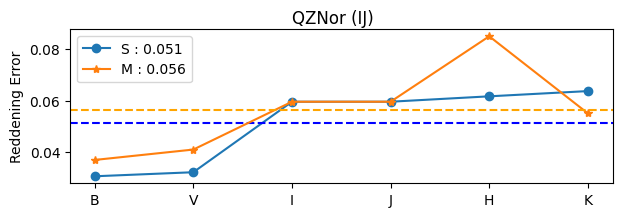

./docs/plots/4_reddening/94_jesper_4_IH_0SM.pdf


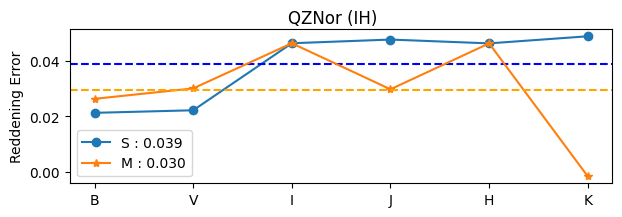

./docs/plots/4_reddening/94_jesper_4_IK_0SM.pdf


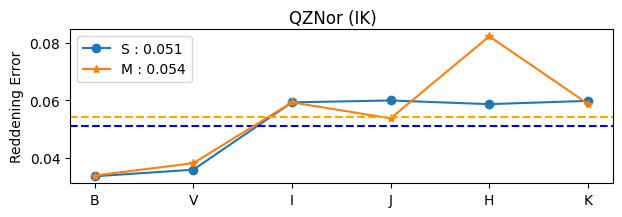

./docs/plots/4_reddening/94_jesper_4_JH_0SM.pdf


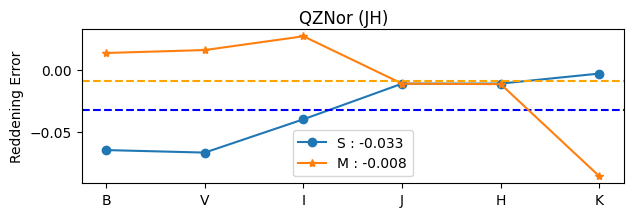

./docs/plots/4_reddening/94_jesper_4_JK_0SM.pdf


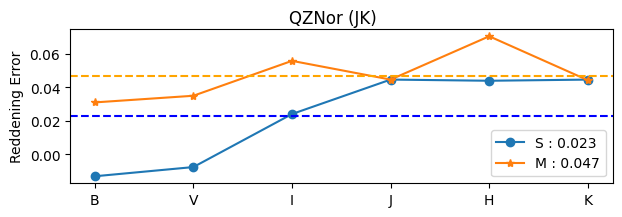

./docs/plots/4_reddening/94_jesper_4_HK_0SM.pdf


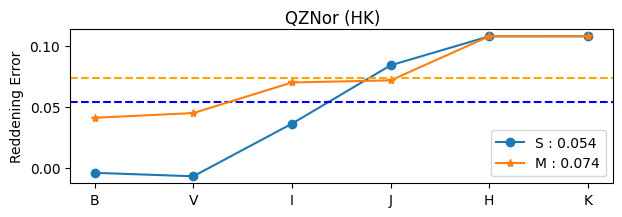

./docs/plots/4_reddening/94_jesper_5_BV_0SM.pdf


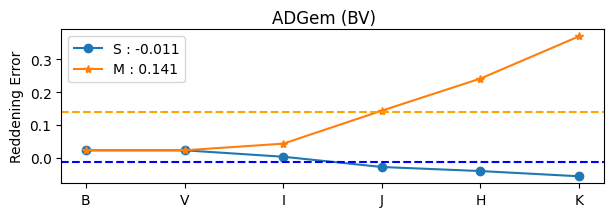

./docs/plots/4_reddening/94_jesper_5_BI_0SM.pdf


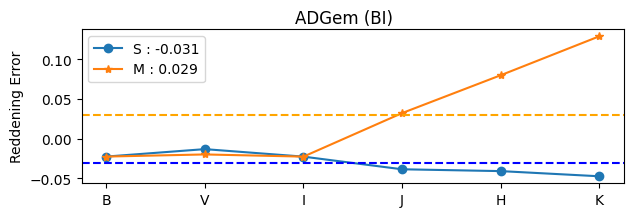

./docs/plots/4_reddening/94_jesper_5_BJ_0SM.pdf


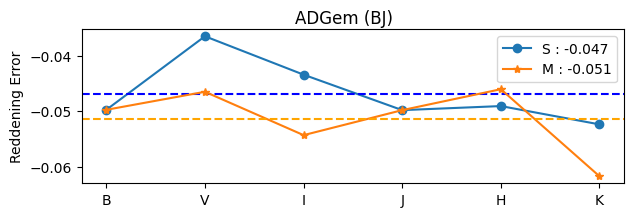

./docs/plots/4_reddening/94_jesper_5_BH_0SM.pdf


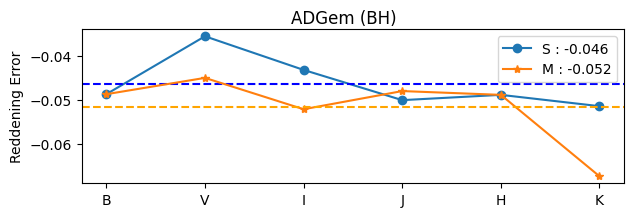

./docs/plots/4_reddening/94_jesper_5_BK_0SM.pdf


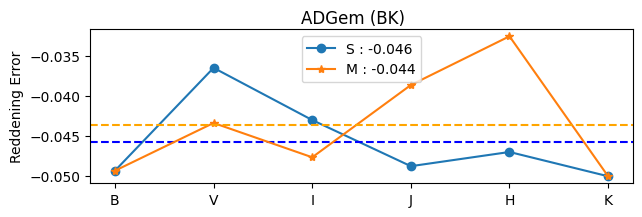

./docs/plots/4_reddening/94_jesper_5_VI_0SM.pdf


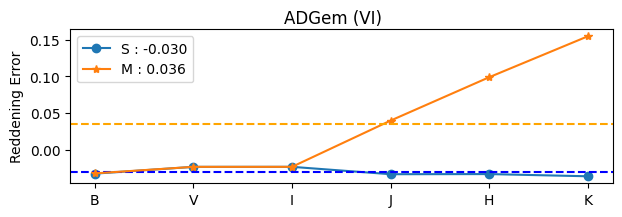

./docs/plots/4_reddening/94_jesper_5_VJ_0SM.pdf


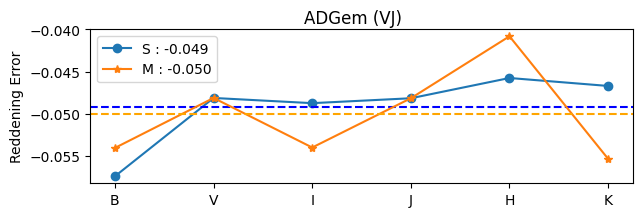

./docs/plots/4_reddening/94_jesper_5_VH_0SM.pdf


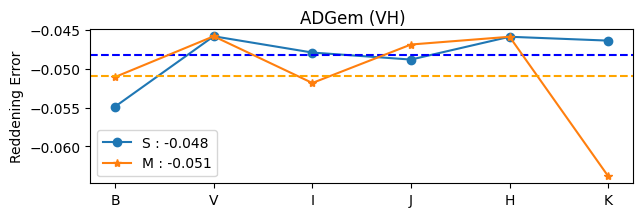

./docs/plots/4_reddening/94_jesper_5_VK_0SM.pdf


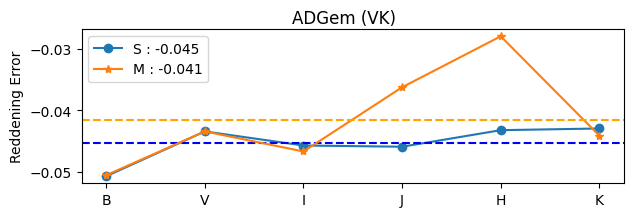

./docs/plots/4_reddening/94_jesper_5_IJ_0SM.pdf


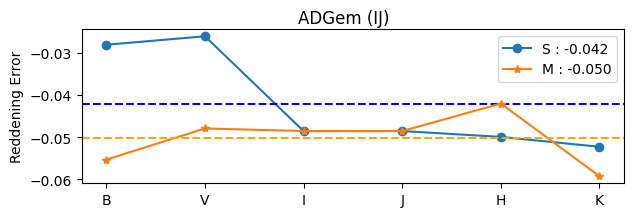

./docs/plots/4_reddening/94_jesper_5_IH_0SM.pdf


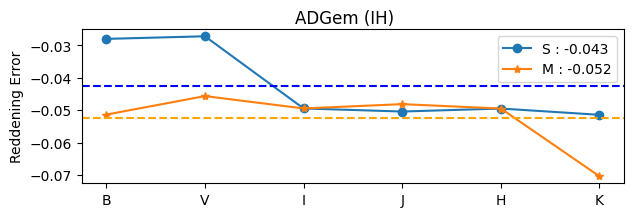

./docs/plots/4_reddening/94_jesper_5_IK_0SM.pdf


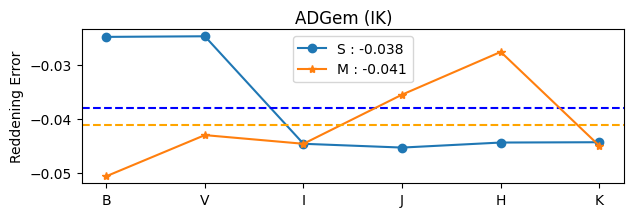

./docs/plots/4_reddening/94_jesper_5_JH_0SM.pdf


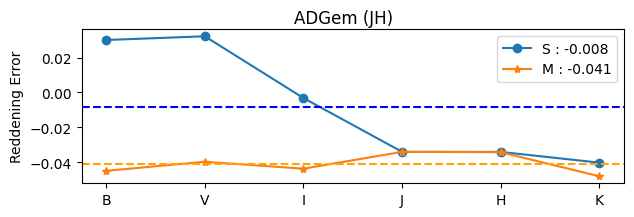

./docs/plots/4_reddening/94_jesper_5_JK_0SM.pdf


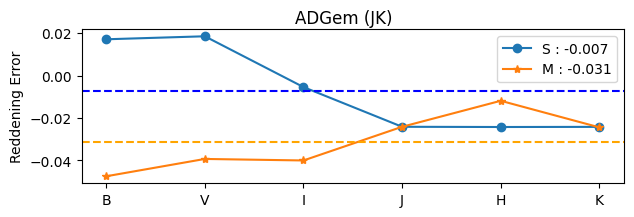

./docs/plots/4_reddening/94_jesper_5_HK_0SM.pdf


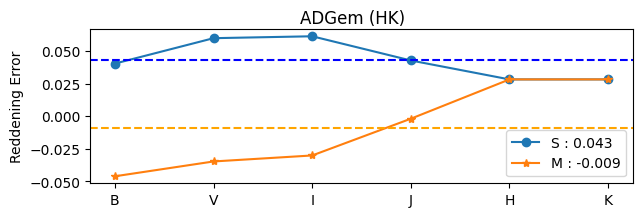

In [1]:
from data.datamapping import colors, mag
cols = colors(mag)
from lvtlaw.h_loadoutput import *
from lvtlaw.e_error_estimation import plot_star_rd0, plot_star_rd0SM
ext0, red0, mu_df_list_dict, data = rd_mu_error_matrix_()    
for i in range(2,6):
    for col in cols:
        plot_star_rd0SM(i, red0, col, '0')
    #plot_star_rd0SM(i, red0, 'VI', '0')
    #plot_star_rd0SM(i, red0, 'VK', '0')
    #plot_star_rd0SM(i, red0, 'JK', '0')
    

# Decoupling Distance Reddening Systematic Errors

109_IRSB_IH_35_star_SVJ_j
./docs/reports/plots/6_rms/109_IRSB_IH_35_star_SVJ_j.pdf


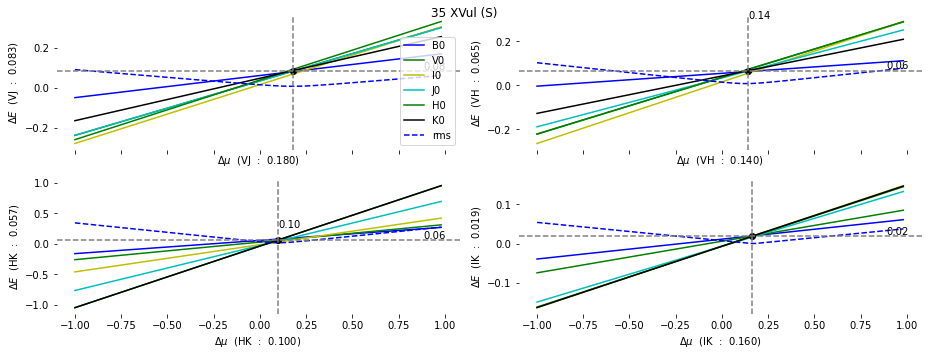

109_IRSB_IH_44_star_SVJ_j
./docs/reports/plots/6_rms/109_IRSB_IH_44_star_SVJ_j.pdf


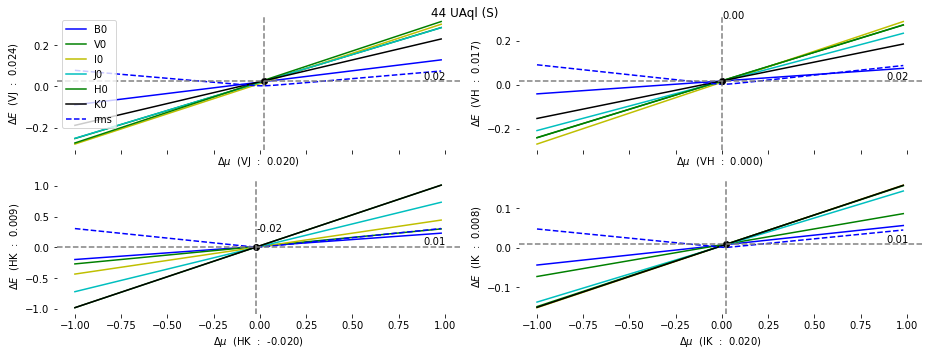

109_IRSB_IH_9_star_SVJ_j
./docs/reports/plots/6_rms/109_IRSB_IH_9_star_SVJ_j.pdf


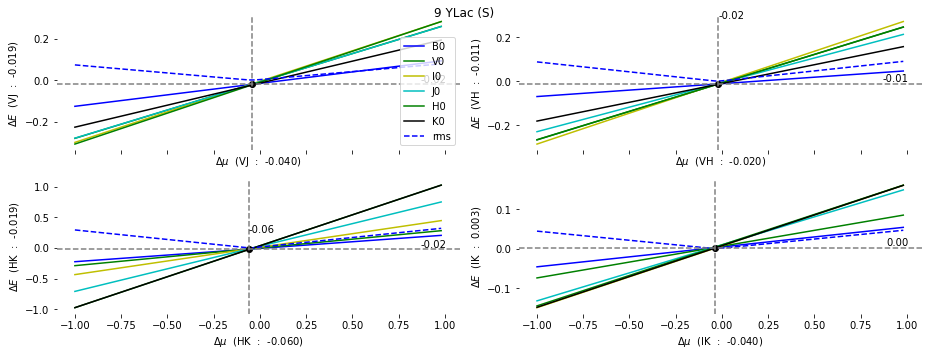

109_IRSB_IH_40_star_SVJ_j
./docs/reports/plots/6_rms/109_IRSB_IH_40_star_SVJ_j.pdf


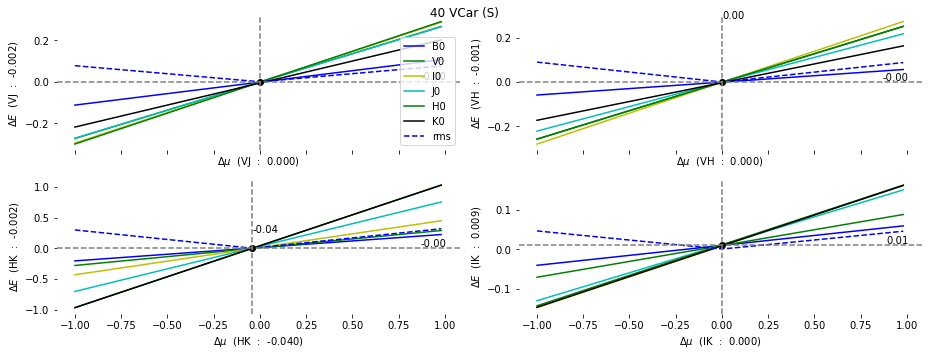

109_IRSB_IH_0_star_SVJ_j
./docs/reports/plots/6_rms/109_IRSB_IH_0_star_SVJ_j.pdf


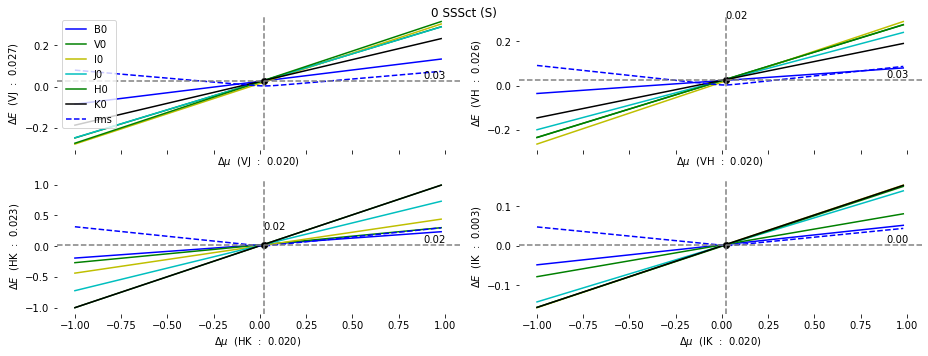

109_IRSB_IH_1_star_SVJ_j
./docs/reports/plots/6_rms/109_IRSB_IH_1_star_SVJ_j.pdf


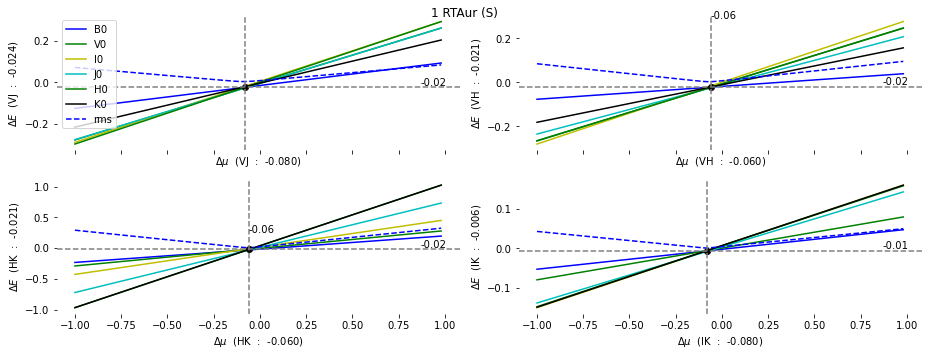

109_IRSB_IH_2_star_SVJ_j
./docs/reports/plots/6_rms/109_IRSB_IH_2_star_SVJ_j.pdf


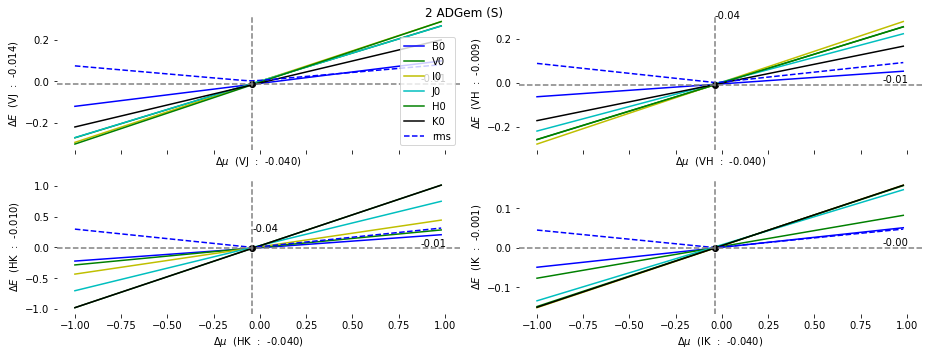

109_IRSB_IH_23_star_SVJ_j
./docs/reports/plots/6_rms/109_IRSB_IH_23_star_SVJ_j.pdf


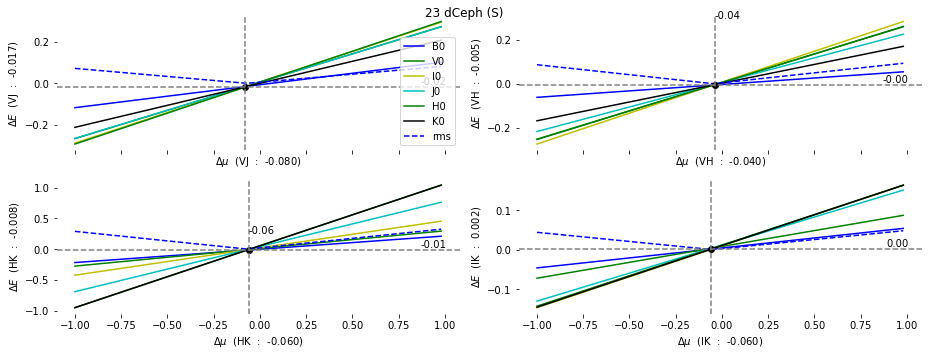

In [8]:
from lvtlaw.f_star_wise import plot_star_rd_mu
from lvtlaw.h_loadoutput import *
stars_list, stars_ex_red_mu_list, correction, data = starwise_analysis_()
four_stars = [35,44,9,40, 0,1,2,23]#[5,9,25,26]
A = ['VJ', 'VH', 'HK','IK']
B = ['IJ','IH', 'JH', 'HK']
wes_show = A
for i in four_stars:
    plot_star_rd_mu(i, stars_ex_red_mu_list, correction, 'S', '0', dis_flag[0], wes_show[:4],1)
    #plot_star_rd_mu(i, stars_ex_red_mu_list, correction, 'S', '0', dis_flag[0], wes_show[4:8],1)
    #plot_star_rd_mu(i, stars_ex_red_mu_list, correction, 'S', '0', dis_flag[0], wes_show[8:12],1)
    #plot_star_rd_mu(i, stars_ex_red_mu_list, correction, 'S', '0', dis_flag[0], wes_show[12:],1)

* * datamapping module loaded!
* * a_utils module loaded!
* * datamapping module loaded!
* * datamapping module loaded!
71_IRSB_plx _j


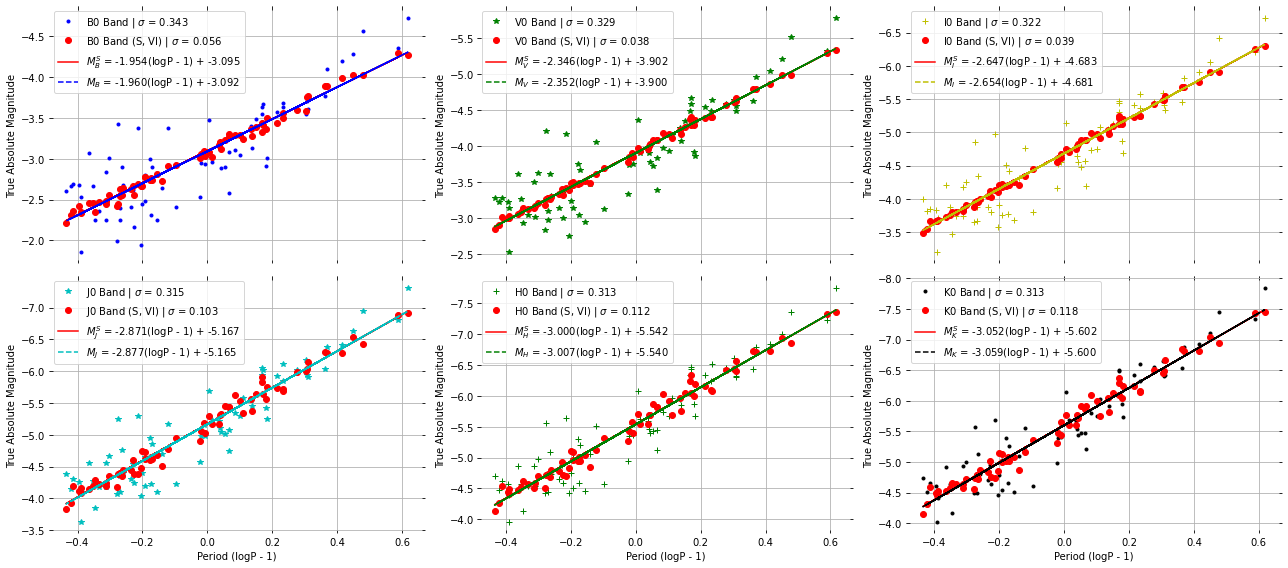

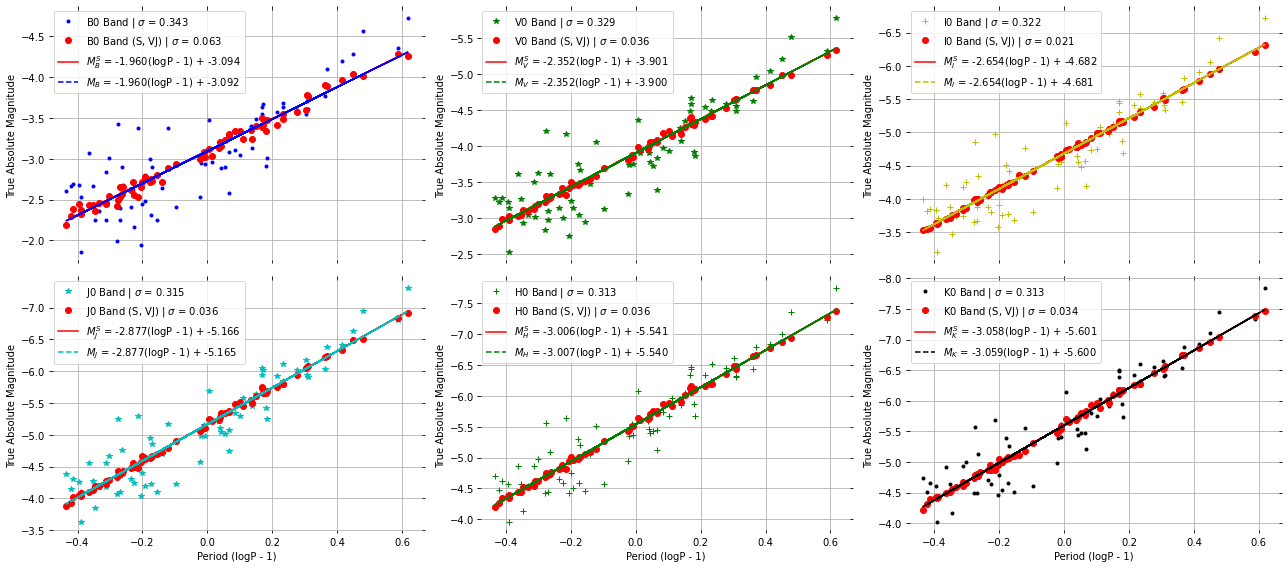

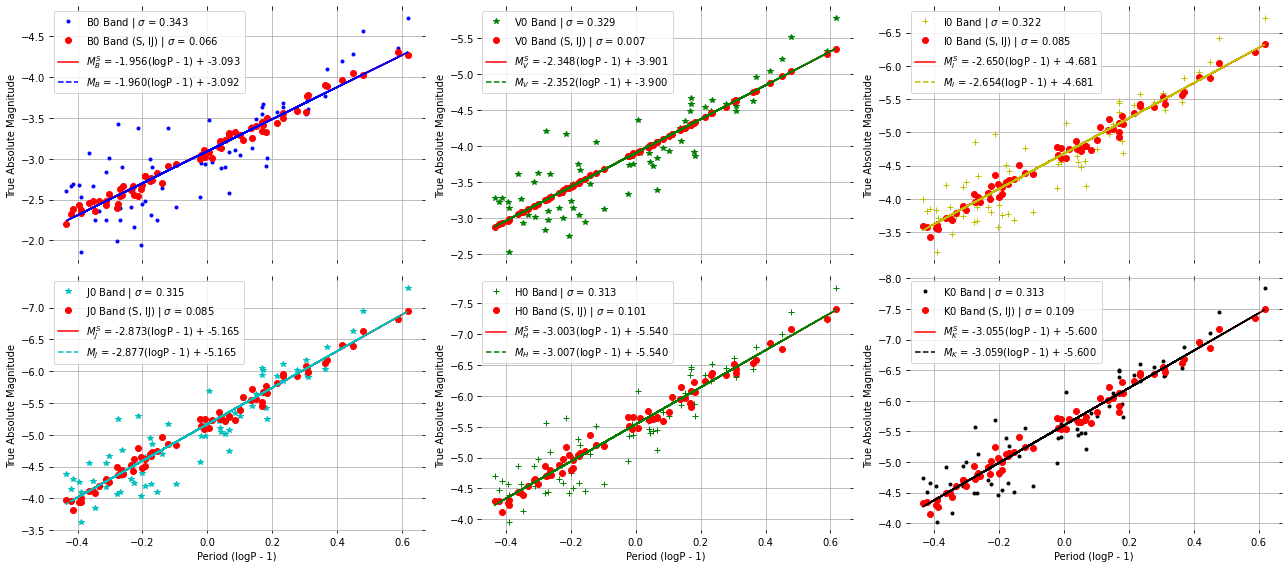

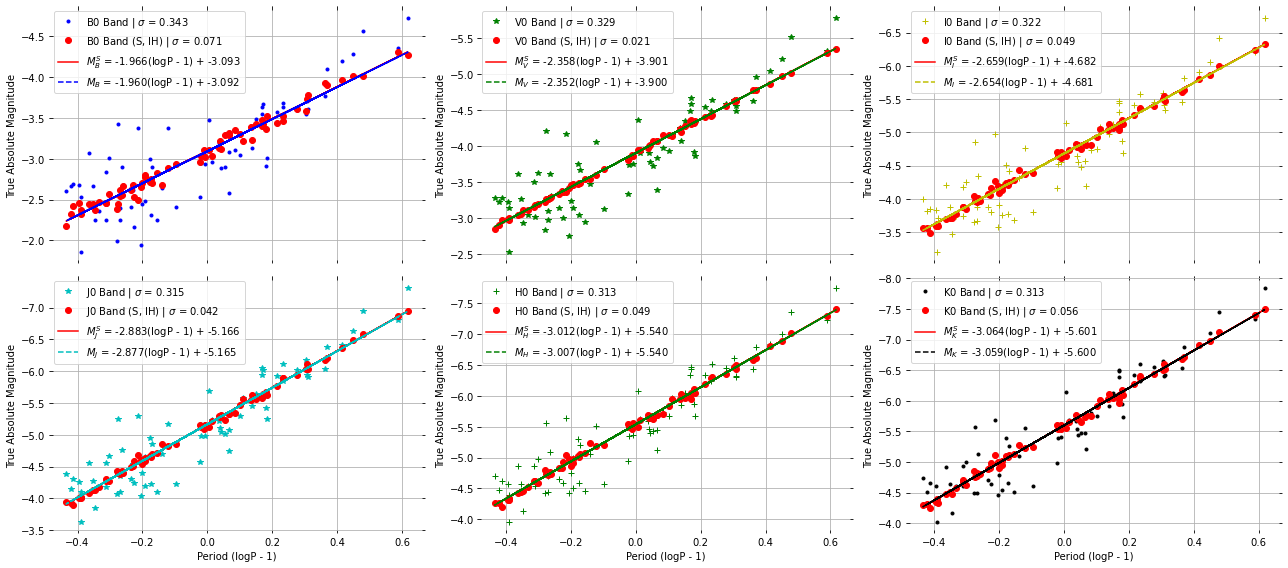

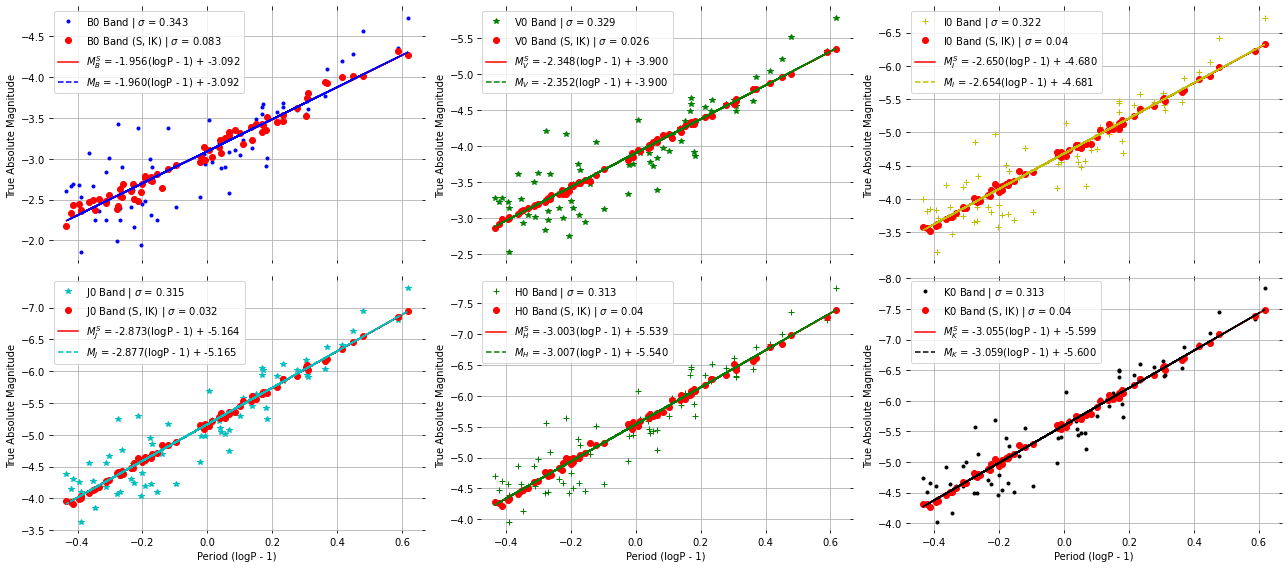

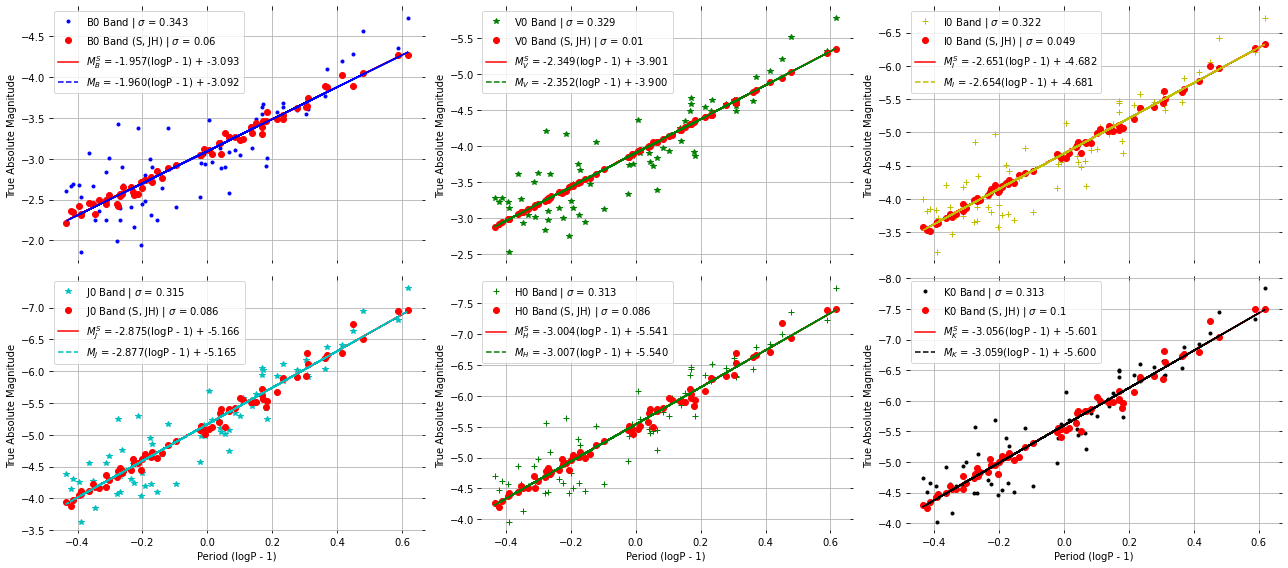

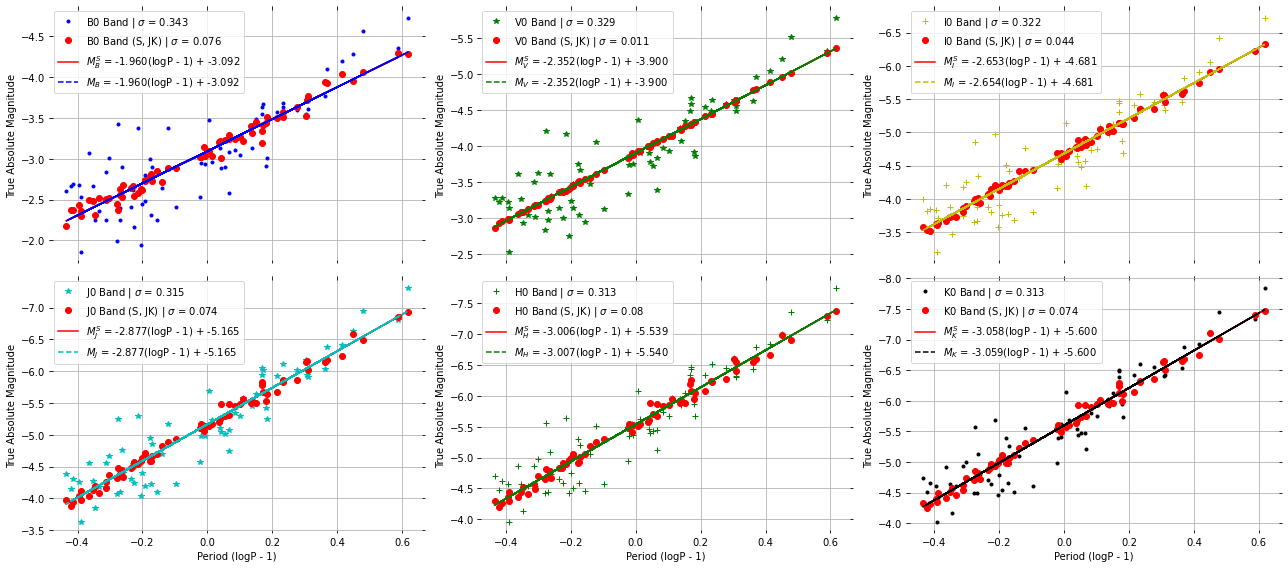

In [1]:
from lvtlaw.g_result import plotresultPL6, plotresultcleanPL6, plotresultPL6_, plotresultPL6_compare
from lvtlaw.h_loadoutput import calibrated_result_
from data.datamapping import *
import pandas as pd
result, r_reg, res, pre = calibrated_result_()
#jesper = pd.read_csv(f'./data/processed/{file_name[:-2]}{dis_flag[0]}_3.23/2_PLPW/{file_name[:3]}_merged_data.csv')
#reg = pd.read_csv(f'./data/processed/{file_name[:-2]}{dis_flag[0]}_3.23/2_PLPW/{file_name[:3]}_5_regression.csv')
#print(jesper.info())
#dd = ['BV','VI','VJ','VK','IJ','IH','IK', 'JK', 'JH', 'HK']
dd71 = ['VJ','IH', 'IK', 'JH', 'JK']
print(file_name, dis_flag[0])
for col in dd:
    x=1
    plotresultPL6_(result, r_reg, col, dis_flag[0], 'S', '0',0)
    #plotresultPL6_compare(jesper,col,reg, result, r_reg, col, dis_flag[0], 'S', '0',1)

71_IRSB_plx _j


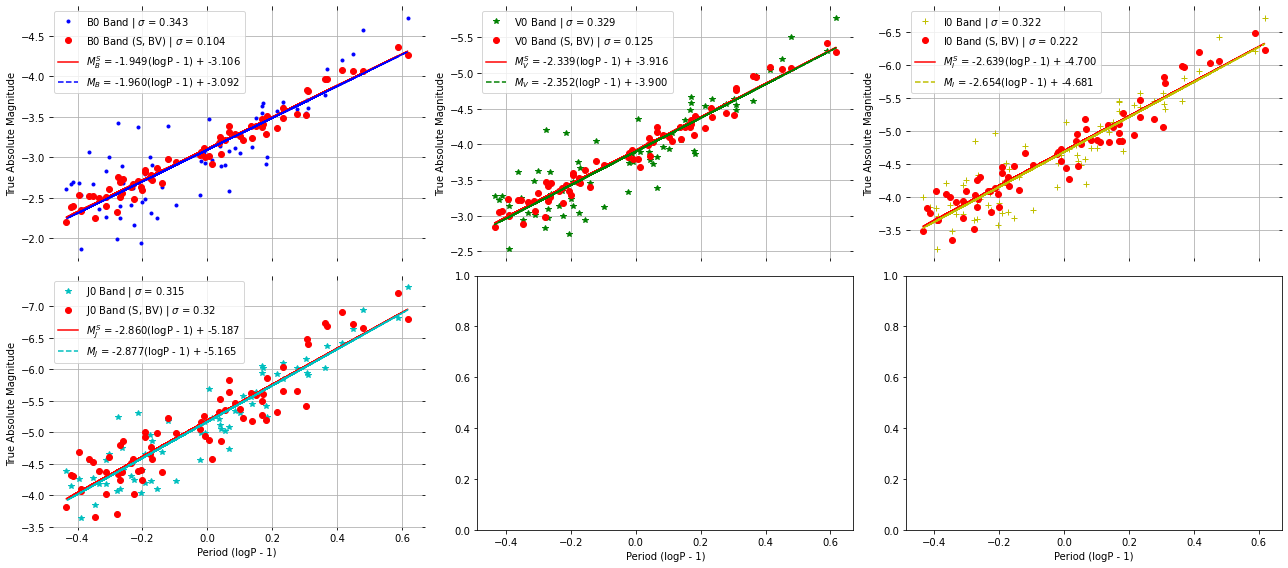

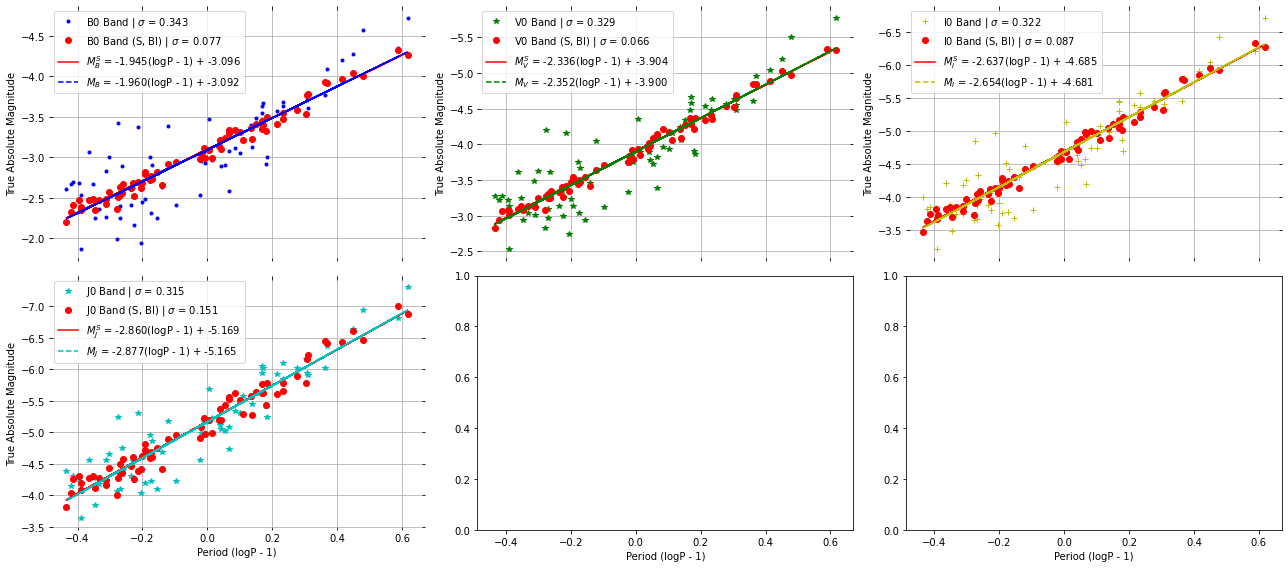

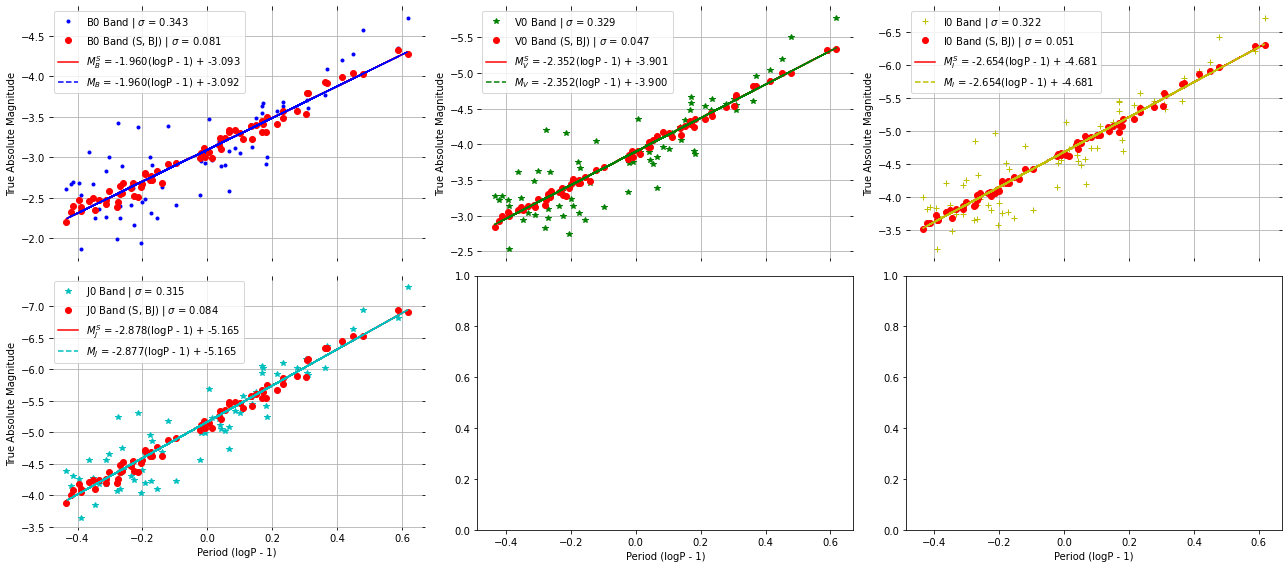

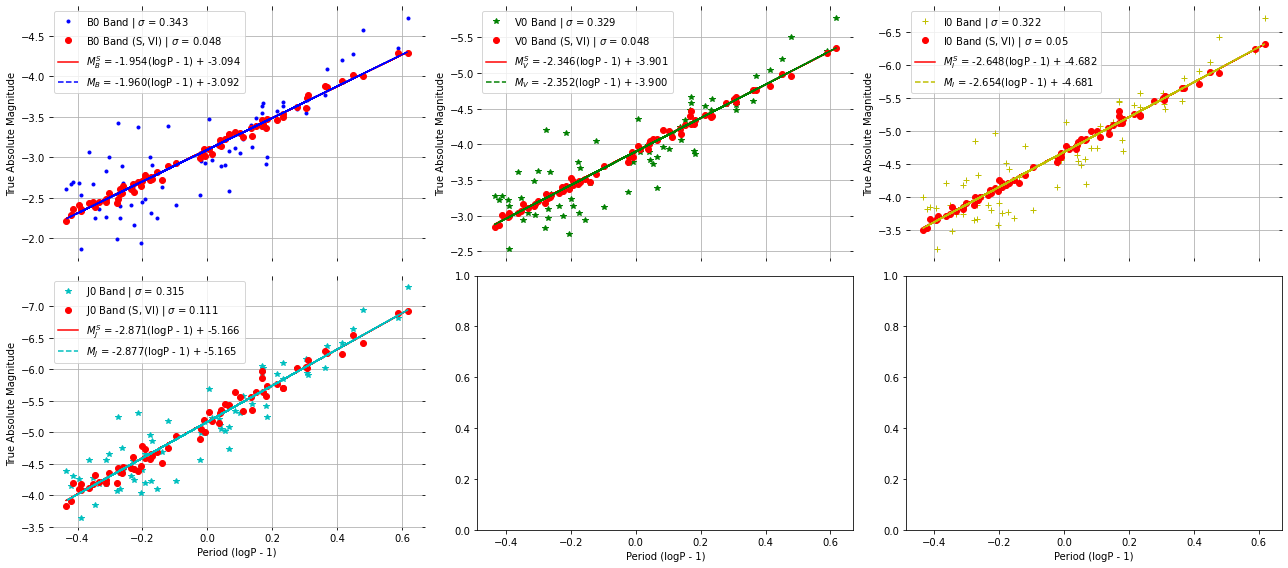

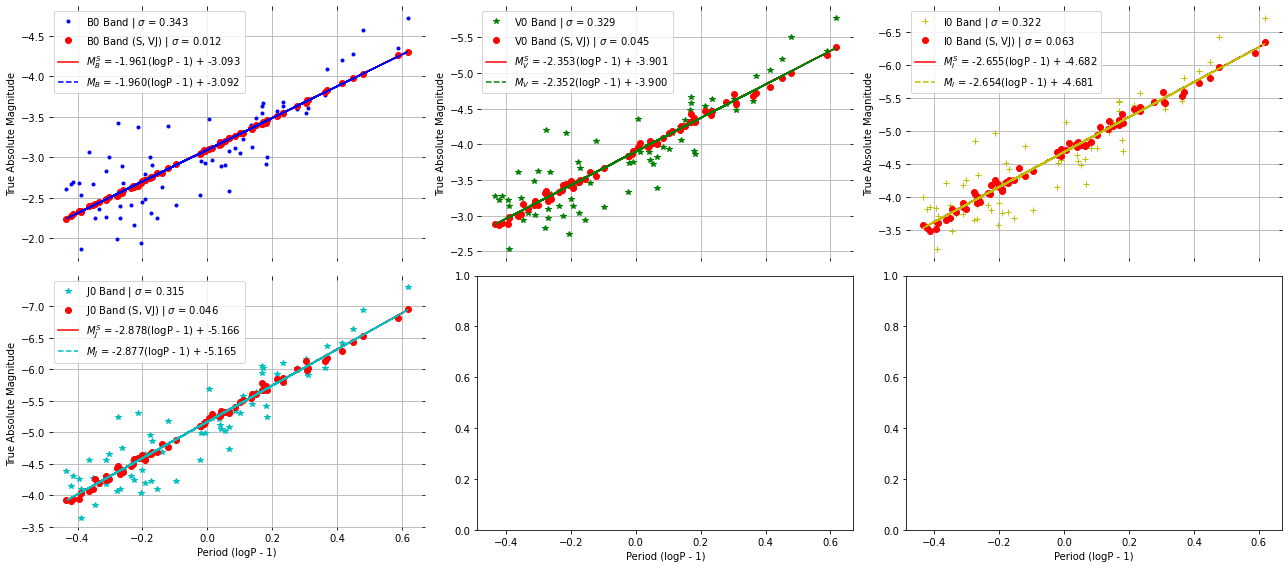

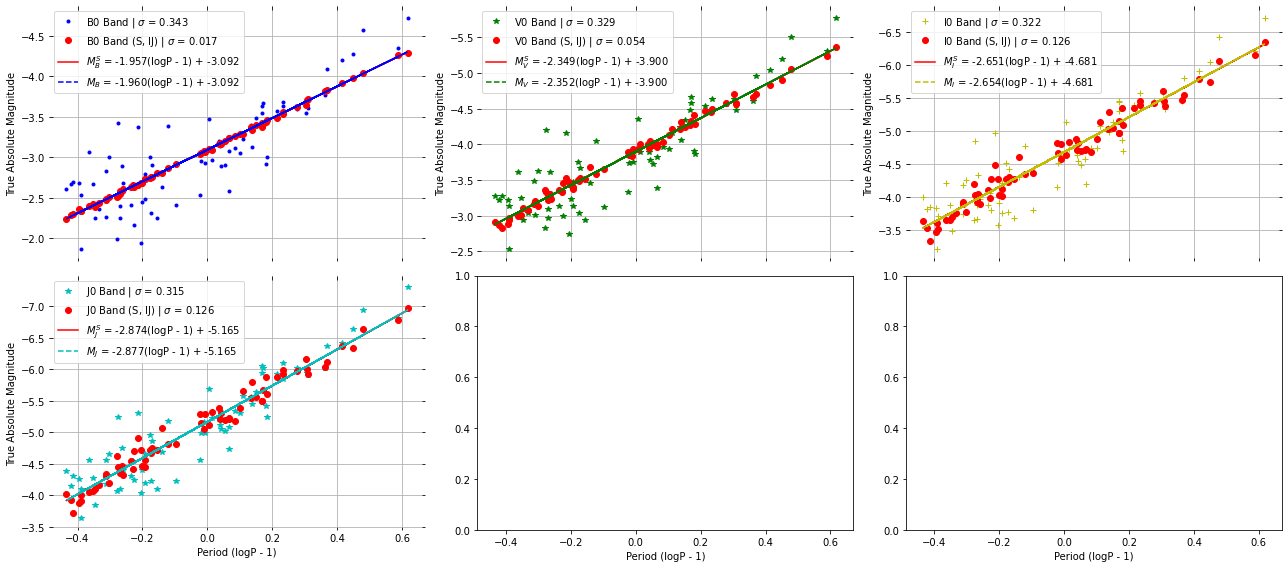

In [3]:
from lvtlaw.g_result import plotresultPL6, plotresultcleanPL6, plotresultPL6_, plotresultPL6_compare
from lvtlaw.h_loadoutput import calibrated_result_
from data.datamapping import *
import pandas as pd
result, r_reg, res, pre = calibrated_result_()
#jesper = pd.read_csv(f'./data/processed/{file_name[:-2]}{dis_flag[0]}_3.23/2_PLPW/{file_name[:3]}_merged_data.csv')
#reg = pd.read_csv(f'./data/processed/{file_name[:-2]}{dis_flag[0]}_3.23/2_PLPW/{file_name[:3]}_5_regression.csv')
#print(jesper.info())
#dd = ['BV','VI','VJ','VK','IJ','IH','IK', 'JK', 'JH', 'HK']
dd = ['VI','VJ','IJ', 'IH', 'IK', 'JH', 'JK']
print(file_name, dis_flag[0])
for col in wes_show:
    x=1
    plotresultPL6_(result, r_reg, col, dis_flag[0], 'S', '0',0)
    #plotresultPL6_compare(jesper,col,reg, result, r_reg, col, dis_flag[0], 'S', '0',1)

In [3]:
from data.datamapping import *
import pandas as pd
from lvtlaw.g_result import print_PL

data = pd.read_csv(f'./data/input/{file_name}.csv')
cols = ['VH']

def update_result(data, result, cols):
    for col in cols:
        data[dis_list[0]] = result[f'muS0{col}{dis_flag[0]}']
        data['EBV'] = result[f'rdS0{col}{dis_flag[0]}']
        data.to_csv(f'./data/input/{file_name}_{col}.csv')
        print(f'./data/input/{file_name}_{col}.csv')
#result.style#[[f'rdS0{col}_j' for col in ['VJ']]]#.style

update_result(data, result, cols)

./data/input/109_IRSB_plx_IH_VH.csv


In [5]:
!python3 main.py

* * datamapping module loaded!
* * a_utils module loaded!
* * b_data_transform module loaded!
* * c_pl_pw module loaded!
* * d_del_del module loaded!
* * e_error_estimation module loaded!
* * f_star_wise module loaded!
* * datamapping module loaded!
* * main_modules module loaded!
* * datamapping module loaded!
* * * * * * * * * * * * * * * * * * * * 
* * * * * * * * * * * * * * * * * * * * 


Master Thesis Project: 	Galactic BVIJHK Leavitt Law Calibration for R_v = 3.23 

  			To Refine systematic errors in luminosity, distance and reddening of individual Cepheid. 
			______________________________________________________

     			Author: Shubham Mamgain (mshubham00@gmail.com) 
     			Supervisor I: Dr. Jesper Storm (AIP Potsdam)
     			Supervisor II: Prof. Dr. Maria Rosa Cioni




			To begin the calibration process, store cleaned data at ./data/input/<file_name>.csv 

			For datafile selection (k) and columns mapping, edit ./data/datamapping.py file.

			Autosave (s = 1) | Paging (

# Comparing results

In [8]:
for col in ['IK']:
    s, m = print_PL(r_reg, col, file_name)

PL for 29_LMC calibrated with IK
V(0.056) = -2.713(0.028) (logP - 1) 14.296(0.011)
I(0.028) = -2.966(0.014) (logP - 1) 13.605(0.006)
J(0.017) = -3.129(0.009) (logP - 1) 13.215(0.003)
K(0.023) = -3.231(0.011) (logP - 1) 12.783(0.005)


# LMC and SMC

In [11]:
LMC = pd.read_csv('data/processed/29_LMC_3.4/8_result/29_corrected.csv')
SMC = pd.read_csv('data/processed/32_SMC_VIJK_2.53/8_result/32_corrected.csv')
SMC.head()

Unnamed: 0    name      logP  rdS0VI_s  muS0VI_s    VS0VI_s    IS0VI_s  \
0           0  HV1328  1.199692 -0.123720    18.335  14.495013  13.680109   
1           1  HV1333  1.212084 -0.002302    19.395  14.547823  13.705076   
2           2  HV1335  1.157800 -0.034718    18.804  14.668838  13.844486   
3           3  HV1345  1.129670 -0.061005    18.891  14.741343  13.940040   
4           4   HV822  1.223807  0.016545    19.038  14.515140  13.664698   

     JS0VI_s    KS0VI_s  rdS0VJ_s  ...    VS0IK_s    IS0IK_s    JS0IK_s  \
0  13.140945  12.689603 -0.254087  ...  14.817441  13.953809  13.362667   
1  13.115213  12.632165  0.009191  ...  14.705903  13.905732  13.361283   
2  13.281378  12.798568 -0.078206  ...  14.766037  13.948526  13.392714   
3  13.335650  12.817869 -0.100108  ...  14.873681  14.146676  13.621539   
4  13.131093  12.627628 -0.020596  ...  14.452026  13.584518  13.032710   

     KS0IK_s  rdS0JK_s  muS0JK_s    VS0JK_s    IS0JK_s    JS0JK_s    KS0JK_s  
0  12.882088 -0.085950    18.435  14.299453  13.513217  13.004632  12.570491  
1  12.903781  0.003070    19.435  14.494233  13.655563  13.070048  12.589447  
2  12.914007  0.014269    18.684  14.664899  13.877730  13.354282  12.893780  
3  13.148336  0.058357    18.531  14.799356  14.088649  13.580895  13.117471  
4  12.519005  0.058541    18.878  14.568892  13.750325  13.250719  12.766378  

[5 rows x 39 columns]

Vl = -2.706552 logP - 1 ( 0.025435) + 14.295991 ( 0.010160)
Vs = -2.861707 logP - 1 ( 0.032908) + 15.173917 ( 0.012866)
Il = -2.959622 logP - 1 ( 0.010407) + 13.604946 ( 0.004157)
Is = -3.089638 logP - 1 ( 0.021172) + 14.369043 ( 0.008278)
Jl = -3.123040 logP - 1 ( 0.068410) + 13.215930 ( 0.027326)
Js = -3.016236 logP - 1 ( 0.057712) + 13.800067 ( 0.022565)
Kl = -3.224539 logP - 1 ( 0.086151) + 12.783597 ( 0.034413)
Ks = -3.260849 logP - 1 ( 0.052127) + 13.368596 ( 0.020381)


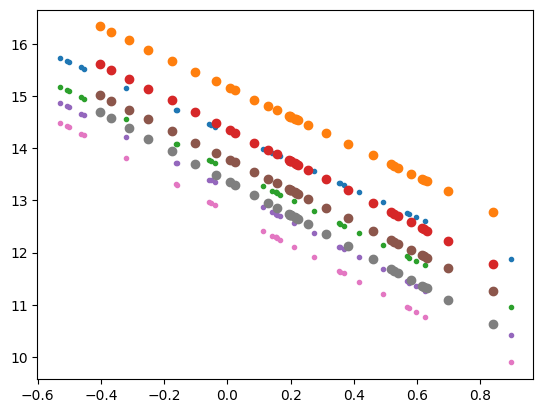

In [4]:
from lvtlaw.a_utils import regression
import matplotlib.pyplot as plt
import pandas as pd
#LMC = pd.read_csv('data/input/23_LMC.csv')
#SMC = pd.read_csv('data/input/32_SMC_VIJK.csv')
col='VI'
xl=LMC['logP']-1
xs=SMC['logP']-1
#xm = new_M['logP']-1
x_str = 'logP - 1'
cl, cs = [], []
for i, m in enumerate(['V', 'I', 'J', 'K']):
    y_str = m
#    yl=LMC[f'{m}_mag']- R[i]*LMC['EBV'] - LMC['IRSB']
    yl=LMC[f'{m}S0{col}_l']#- R[i]*LMC['EBV_lVK'] - LMC['IRSB']
    ys=SMC[f'{m}S0{col}_s']#- R[i]*SMC['EBV'] - SMC['IRSB']
    rl = regression(xl, yl, x_str, y_str+'l', p = 1)
    cl.append(rl[1])
    rs = regression(xs, ys, x_str, y_str+'s', p = 1)
    cs.append(rs[1])
    #plt.plot(xm, new_M[f'{m}_gVK'], 'k.')
    plt.plot(xl, rl[2], '.')
    plt.plot(xs, rs[2], 'o')
#    plt.plot(pre['logP']-1, pre[f'p_{m}0_g'], '+')
    #plt.plot(new_M['logP']-1, new_M[f'{m}_cVK'], '+')
    #plt.plot(xs, rs[2], '--')
    #plt.show()

# Distance to LMC

In [5]:
mag = ['V', 'I', 'J', 'K']
mod_LMC = pd. DataFrame()
for col in ['VI', 'JK']:
    rcg = r_reg[[f'{m}0{col}S' for m in mag]].loc[1].values # Milky Way
    mod_LMC[col+'_p'] = cl - rcg
    #rci = r_reg[[f'{m}0{col}S' for m in mag]].loc[5].values
    #mod_LMC[col+'_i'] = cl - rci 
    #mod_LMC.index = mag
mod_LMC#.mean()

VI_p       JK_p
0  18.264931  18.267746
1  18.358532  18.355877
2  18.473416  18.466392
3  18.474518  18.465065

# Distance to SMC

In [6]:
mod_SMC = pd. DataFrame()
for col in ['VI', 'JK']:
    rcg = r_reg[[f'{m}0{col}S' for m in mag]].loc[1].values
    mod_SMC[col+'_p'] = cs - rcg
    #rci = result_reg[[f'{m}{col}' for m in mag]].loc[5].values
    #mod_SMC[col+'_i'] = cs - rci 
    #mod_SMC.index = mag
mod_SMC

VI_p       JK_p
0  19.142857  19.145671
1  19.122630  19.119975
2  19.057553  19.050529
3  19.059517  19.050064

In [ ]:
!pdflatex pipeline.tex